In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os

warnings.filterwarnings('ignore')

## Read Train data

In [4]:
train_home_team_statistics_df = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Train_Data/train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Y_train_1rknArQ.csv', index_col=0)

train_home = train_home_team_statistics_df.iloc[:,2:]
train_away = train_away_team_statistics_df.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1)
train_scores = train_scores.loc[train_data.index]

train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})


In [5]:
train_home_team_statistics_df.head()

LEAGUE                TEAM_NAME  TEAM_SHOTS_TOTAL_season_sum  \
ID                                                                         
0          Ligue 1                 Toulouse                          3.0   
1          Ligue 2                    Brest                          6.0   
2          Serie A                Sampdoria                          4.0   
3       League One            Coventry City                          7.0   
4   Premier League  Wolverhampton Wanderers                          3.0   

    TEAM_SHOTS_INSIDEBOX_season_sum  TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                                                      
0                               2.0                               5.0   
1                               8.0                               3.0   
2                               2.0                               5.0   
3                               5.0                               5.0   
4                               3.0                               2.0   

    TEAM_SHOTS_ON_TARGET_season_sum  TEAM_SHOTS_OUTSIDEBOX_season_sum  \
ID                                                                      
0                               2.0                               1.0   
1                               6.0                               5.0   
2                               2.0                               8.0   
3                               6.0                               6.0   
4                               3.0                               4.0   

    TEAM_PASSES_season_sum  TEAM_SUCCESSFUL_PASSES_season_sum  \
ID                                                              
0                      2.0                                2.0   
1                      8.0                                7.0   
2                      1.0                                1.0   
3                      9.0                                9.0   
4                      4.0                                3.0   

    TEAM_SAVES_season_sum  ...  TEAM_YELLOWCARDS_5_last_match_std  \
ID                         ...                                      
0                     5.0  ...                                3.0   
1                    10.0  ...                                4.0   
2                     2.0  ...                                4.0   
3                     2.0  ...                                4.0   
4                     4.0  ...                                1.0   

    TEAM_REDCARDS_5_last_match_std  TEAM_OFFSIDES_5_last_match_std  \
ID                                                                   
0                              0.0                             6.0   
1                              0.0                             4.0   
2                              5.0                             6.0   
3                              0.0                             1.0   
4                              0.0                             2.0   

    TEAM_ATTACKS_5_last_match_std  TEAM_PENALTIES_5_last_match_std  \
ID                                                                   
0                             0.0                             10.0   
1                             3.0                             10.0   
2                             3.0                              6.0   
3                             8.0                              8.0   
4                             5.0                              8.0   

    TEAM_SUBSTITUTIONS_5_last_match_std  TEAM_BALL_SAFE_5_last_match_std  \
ID                                                                         
0                                   8.0                              7.0   
1                                   0.0                              1.0   
2                                   7.0                              2.0   
3                                   5.0                              5.0   
4                                   7.0                              2.0   



In [6]:
train_scores.head()

HOME_WINS  DRAW  AWAY_WINS
ID                            
0           0     0          1
1           0     1          0
2           0     0          1
3           1     0          0
4           0     1          0

## Benchmark

We try to model if AWAY wins

In [7]:
train_new_y = train_scores['AWAY_WINS']

### train, valid test split

In [8]:
# train_data_bis = train_data.dropna()
# train_data_bis = create_features(train_data_bis)
# train_data_bis = new_features_V4(train_data_bis)
# train_data_bis = train_data_bis.loc[:,list(important_feat) + ["NEW_feat"]]
# train_data_bis

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y.loc[train_data.index], train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

### xgb model

In [10]:
params_1 = {
    'booster': 'gbtree',
    'tree_method':'hist',
    'max_depth': 8, 
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,
    'eval_metric':'mlogloss'
    }


d_train = xgb.DMatrix(X_train.replace({0:np.nan}), y_train)
d_valid = xgb.DMatrix(X_valid.replace({0:np.nan}), y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)

[0]	train-mlogloss:0.68338	eval-mlogloss:0.68785
[1]	train-mlogloss:0.67389	eval-mlogloss:0.68266
[2]	train-mlogloss:0.66467	eval-mlogloss:0.67757
[3]	train-mlogloss:0.65574	eval-mlogloss:0.67304
[4]	train-mlogloss:0.64724	eval-mlogloss:0.66849
[5]	train-mlogloss:0.63894	eval-mlogloss:0.66438
[6]	train-mlogloss:0.63052	eval-mlogloss:0.66062
[7]	train-mlogloss:0.62230	eval-mlogloss:0.65697
[8]	train-mlogloss:0.61454	eval-mlogloss:0.65359
[9]	train-mlogloss:0.60701	eval-mlogloss:0.65015
[10]	train-mlogloss:0.59949	eval-mlogloss:0.64682
[11]	train-mlogloss:0.59224	eval-mlogloss:0.64347
[12]	train-mlogloss:0.58520	eval-mlogloss:0.64026
[13]	train-mlogloss:0.57876	eval-mlogloss:0.63741
[14]	train-mlogloss:0.57188	eval-mlogloss:0.63467
[15]	train-mlogloss:0.56536	eval-mlogloss:0.63191
[16]	train-mlogloss:0.55888	eval-mlogloss:0.62946
[17]	train-mlogloss:0.55254	eval-mlogloss:0.62681
[18]	train-mlogloss:0.54669	eval-mlogloss:0.62444
[19]	train-mlogloss:0.54078	eval-mlogloss:0.62231
[20]	train

### Some analysis

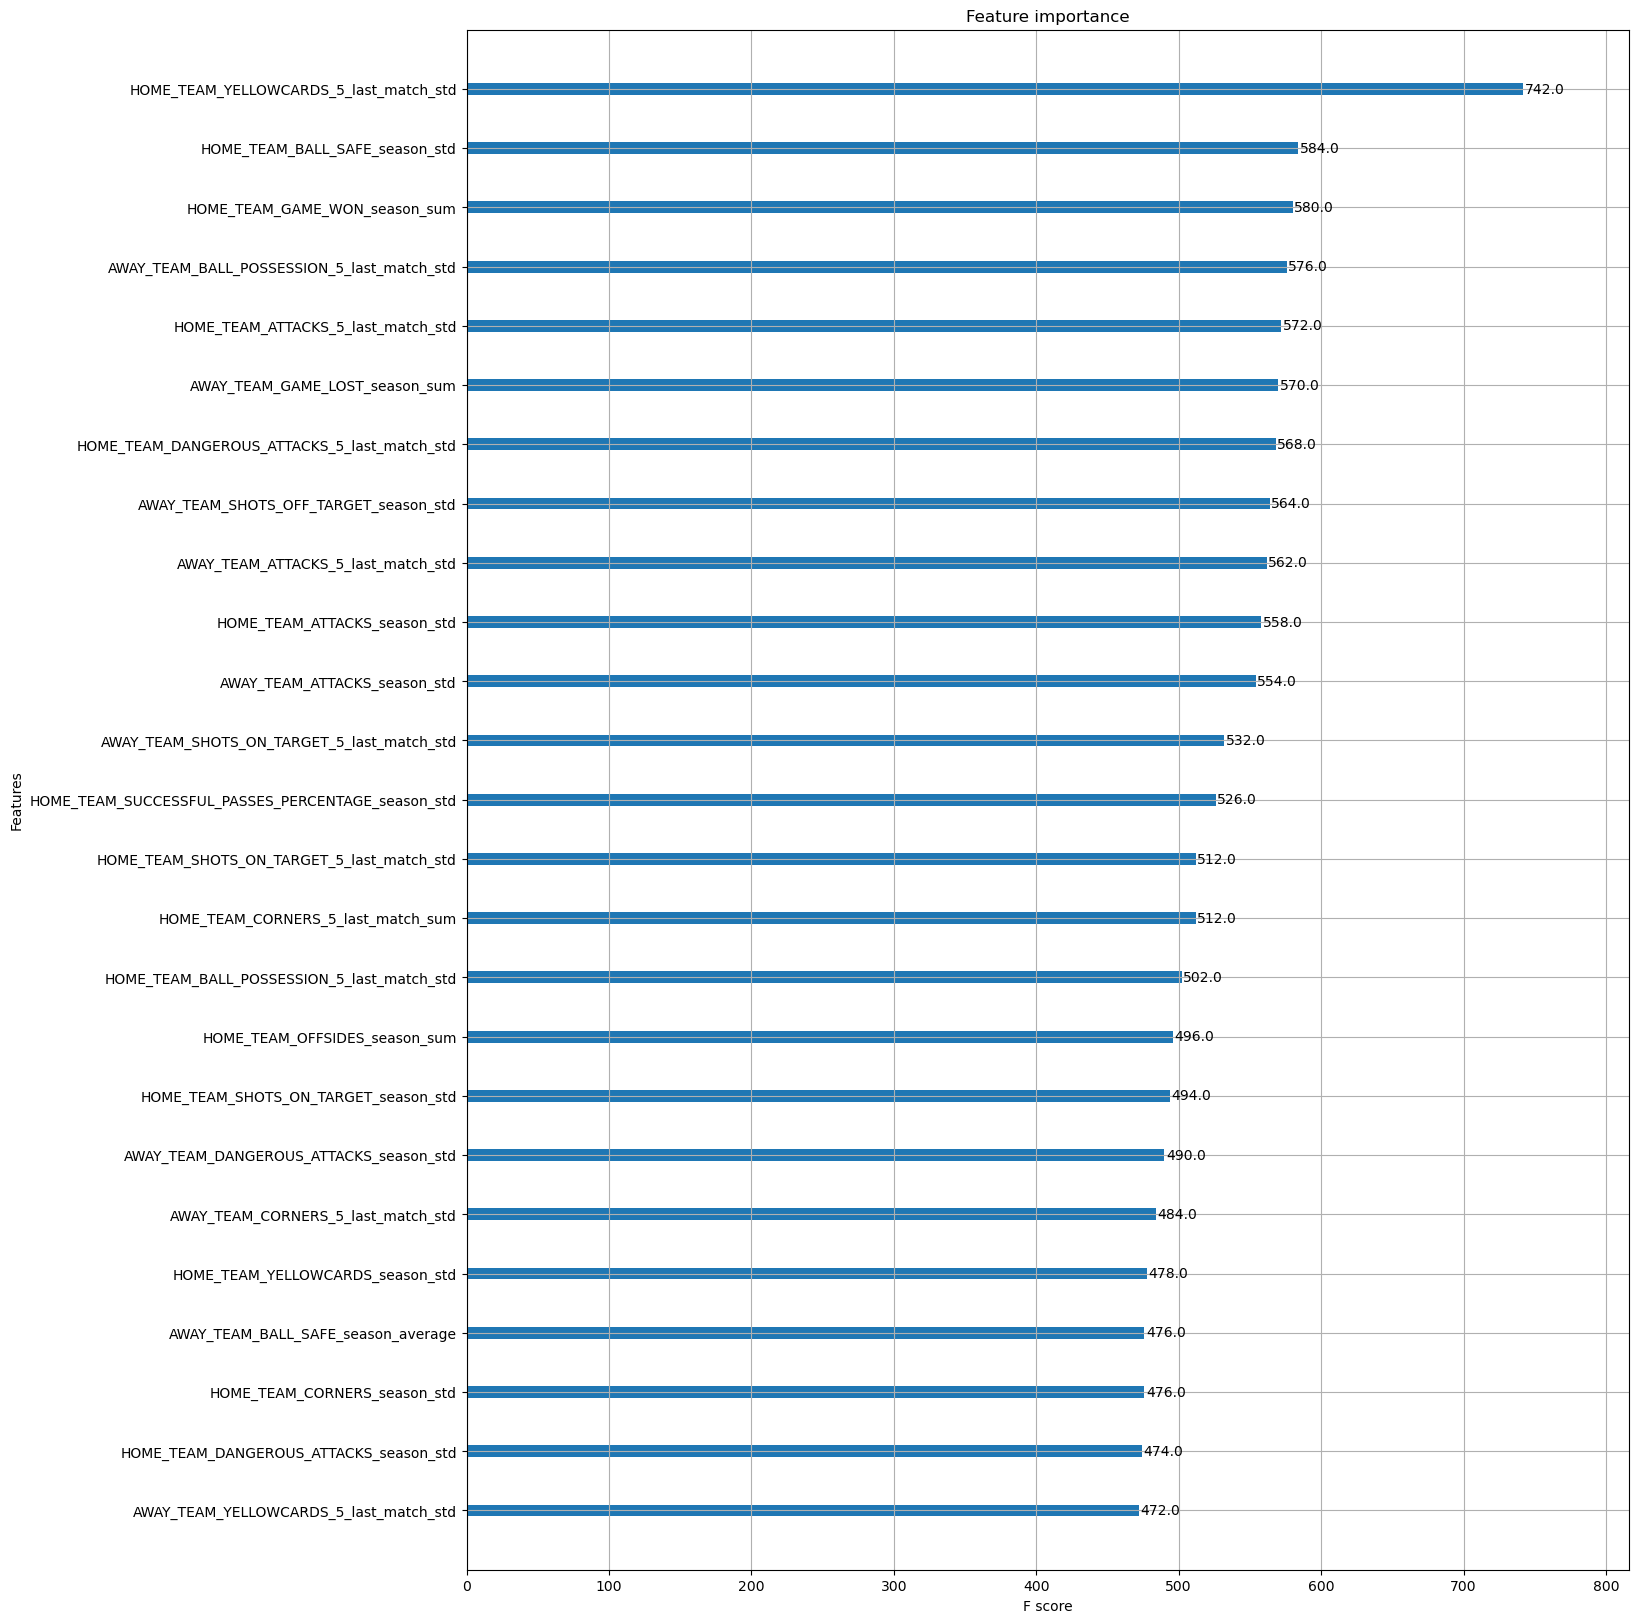

In [11]:
xgb.plot_importance(bst, max_num_features=25)
fig = plt.gcf()
fig.set_size_inches(15, 20)

### Accuracy on test set

A simple benchmark is always predicting home wins

In [12]:
target = train_scores.loc[train_data.index].copy()

home_wins = target
home_wins = 0 * home_wins
home_wins.iloc[:,0] = 1

np.round(accuracy_score(home_wins,target),4)

0.4353

Using our model

In [13]:
X_test_xgb = xgb.DMatrix(train_data)

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
np.round(accuracy_score(predictions,target),4)

0.5944

## Submission

In [14]:
test_home = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

In [15]:
X_bench = xgb.DMatrix(test_data)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv('./benchmark_submission.csv', index=False)

###  $\color{blue}{\text{1. Import data (DIFF GOAL)}}$

In [16]:
New_train_scores = pd.read_csv(r'/Users/badremhiouah/Desktop/Python/Data challenge QRT/benchmark_and_extras/Y_train_supp.csv')
New_train_scores = New_train_scores.loc[train_data.index].reset_index(drop=True)
New_train_scores

ID  GOAL_DIFF_HOME_AWAY
0          0                 -2.0
1          1                  0.0
2          2                 -1.0
3          3                  1.0
4          4                  0.0
...      ...                  ...
12298  12298                 -1.0
12299  12299                 -1.0
12300  12300                 -1.0
12301  12301                  3.0
12302  12302                  2.0

[12303 rows x 2 columns]

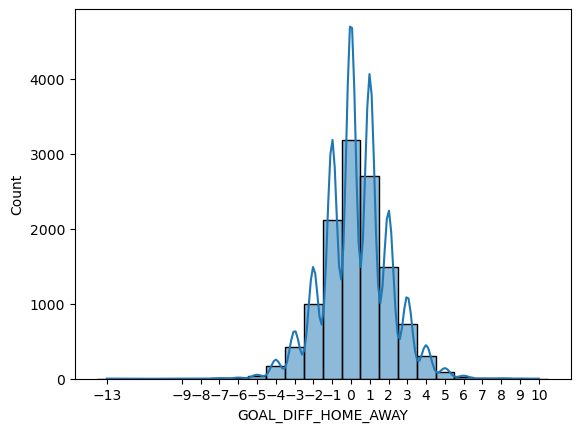

In [17]:
# Assuming New_train_scores is your DataFrame and 'GOAL_DIFF_HOME_AWAY' is the column you want to plot
column_name = 'GOAL_DIFF_HOME_AWAY'

# Calculate the width of each bin based on the distance between adjacent x-ticks
unique_values = sorted(New_train_scores[column_name].unique())
bin_width = min(abs(unique_values[i+1] - unique_values[i]) for i in range(len(unique_values)-1))

# Calculate bin edges centered around each x-tick
bin_edges = [value - bin_width/2 for value in unique_values]
bin_edges.append(unique_values[-1] + bin_width/2)  # Add an extra bin edge for the last bin

sns.histplot(data=New_train_scores, x=column_name, kde=True, bins=bin_edges)
plt.xticks(unique_values)  # Set x-ticks to the unique values in the data
plt.show()

###  $\color{blue}{\text{2. Study correlation}}$

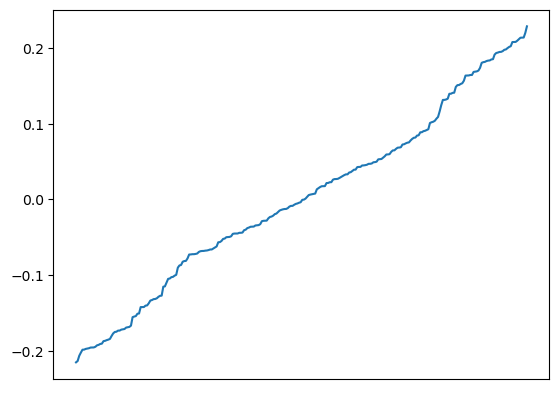

In [18]:
correlation = train_data.corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"])
correlation.sort_values(inplace=True)
correlation.plot(xticks=[])
plt.show()

In [19]:
train_data2 = train_data.copy()
print(len(train_data2))
train_data2 = train_data2[~train_data2.isna().any(axis=1)]
len(train_data2)

12303


8263

In [20]:
def create_features(df):
    # Iterate over the columns
    for col_home in df.columns:
        if col_home.startswith('HOME'):
            col_away = col_home.replace('HOME', 'AWAY')  # Find corresponding AWAY column
            new_col_name = col_home.replace('HOME', 'DIFF')  # Create new column name
            df[new_col_name] = df[col_home] - df[col_away]  # Compute pairwise difference

    return df

train_data2 = create_features(train_data2)

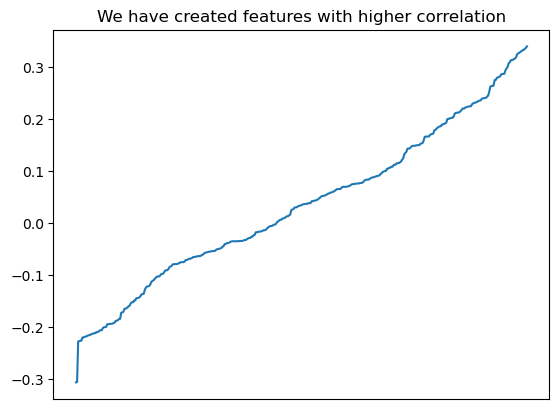

In [21]:
correlation = train_data2.corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"])
correlation.sort_values(inplace=True)
correlation.plot(xticks=[])
plt.title("We have created features with higher correlation")
plt.show()

##  $\color{blue}{\text{3. Simple linear regression with features with highest correlation}}$

In [22]:
# We can do features selections
def filtration_columns(q1=0.9,q2=0.1):
    filtered_corr = correlation[(correlation.values > np.quantile(correlation,q1)) | (correlation.values < np.quantile(correlation,q2))]
    Selection_features = filtered_corr.index
    return Selection_features

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Choose how many features we want
Selection_features = filtration_columns(0.95,0.05)

# Extract the columns for regression
X = train_data2[Selection_features] # Independent variables
X.fillna(0, inplace = True)
y = New_train_scores.loc[train_data2.index,"GOAL_DIFF_HOME_AWAY"]            # Dependent variable
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Training R-squared: 0.17463917760826753
Testing R-squared: 0.15254427292187267


In [24]:
def convert_to_outcome_df(y_pred, X_test,lim_win = -0.1, lim_loss = -0.4 ):
    # Create a DataFrame with index equal to X_test
    outcome_df = pd.DataFrame(index=X_test.index)
    
    # Convert predicted values into binary outcomes
    outcome_df['HOME_WINS'] = (y_pred >= lim_win).astype(int)
    outcome_df['DRAW'] = (y_pred > lim_loss)&(y_pred < lim_win).astype(int)
    outcome_df['AWAY_WINS'] = (y_pred < lim_loss).astype(int)
    
    return outcome_df

In [25]:
y_test_pred = convert_to_outcome_df(y_test_pred,X_test)

target = train_scores.loc[X_test.index].copy()

np.round(accuracy_score(y_test_pred,target),4)

0.5021

###  $\color{blue}{\text{4. Linear regression LASSO with selected features based on correlation}}$

In [26]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

A = np.linspace(0.5,1,10)
B = np.linspace(0,0.5,10)

l = []

best_selection = 0,0
best_r2 = 0
for a in A:
    for b in B:
        try:
            # Choose how many features we want
            Selection_features = filtration_columns(a,b)

            # Extract the columns for regression
            X = train_data2[Selection_features]         # Independent variables
            X.fillna(0, inplace=True)
            y = New_train_scores["GOAL_DIFF_HOME_AWAY"] # Dependent variable

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)   

            # Initialize the LassoCV model
            # Define a range of alpha values
            lasso_cv_model = LassoCV(cv=5)

            # Fit the LassoCV model
            lasso_cv_model.fit(X_train, y_train)

            # Get the best alpha value
            best_alpha = lasso_cv_model.alpha_
            # print("best_alpha : ", best_alpha)

            # Predict on the training and testing sets
            y_train_pred = lasso_cv_model.predict(X_train)
            y_test_pred = lasso_cv_model.predict(X_test)

            # Calculate R-squared scores
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            if train_r2 > best_r2:
                print("Training R-squared:", train_r2)
                # print("Testing R-squared:", test_r2)
                best_selection = a,b
                best_r2 = test_r2
        except:
            l.append([a,b])

print(best_selection)
# best_selection = (0.7777777777777778, 0.2777777777777778)
# best_r2

(0, 0)


In [27]:
# Choose how many features we want
Selection_features = filtration_columns(*best_selection)

# Extract the columns for regression
X = train_data2[Selection_features]         # Independent variables
X.fillna(0, inplace=True)
y = New_train_scores.loc[train_data2.index,"GOAL_DIFF_HOME_AWAY"] # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)   

# Initialize the LassoCV model
# Define a range of alpha values
lasso_cv_model = LassoCV(cv=5)

# Fit the LassoCV model
lasso_cv_model.fit(X_train, y_train)

# Get the best alpha value
best_alpha = lasso_cv_model.alpha_
print("best_alpha : ", best_alpha)

# Predict on the training and testing sets
y_train_pred = lasso_cv_model.predict(X_train)
y_test_pred = lasso_cv_model.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)


best_alpha :  0.11015188393762754
Training R-squared: 0.17614082925192276
Testing R-squared: 0.14947639070731122


In [28]:
# Let's try to find the best lim for our test set:
lim_win_range = np.linspace(-0.5,0,100)
lim_loss_range = np.linspace(-2,-0.5,100)
best_score = 0
for lim_loss in lim_loss_range:
    for lim_win in lim_win_range:
        if lim_win > lim_loss:
            y_test_pred_new = convert_to_outcome_df(y_test_pred,X_test, lim_win= lim_win, lim_loss=lim_loss)

            target = train_scores.loc[X_test.index].copy()

            cur = np.round(accuracy_score(y_test_pred_new,target),4)

            if cur > best_score:
                best_score = cur
                best_lim = lim_win, lim_loss

y_test_pred_new = convert_to_outcome_df(y_test_pred,X_test,lim_win=best_lim[0],lim_loss=best_lim[1])
print(best_lim,best_score)

(-0.45454545454545453, -0.5) 0.5042


In [29]:
# Make sure that the the sign of coefficients are in line with the sign of the correlation
print((X.loc[:,lasso_cv_model.coef_<0].corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"]).values < 0).all())
# print(X.loc[:,lasso_cv_model.coef_<0].corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"]))
print((X.loc[:,lasso_cv_model.coef_>0].corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"]).values > 0).all())
# print(X.loc[:,lasso_cv_model.coef_>0].corrwith(New_train_scores["GOAL_DIFF_HOME_AWAY"]))

False
True


###  $\color{blue}{\text{5. NEW SUBMISSION}}$

In [30]:
# test_home = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_home_team_statistics_df.csv', index_col=0)
# test_away = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_away_team_statistics_df.csv', index_col=0)

# test_home.columns = 'HOME_' + test_home.columns
# test_away.columns = 'AWAY_' + test_away.columns

# test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

# X_final = create_features(test_data)
# X_final = X_final[Selection_features]

# # Replace NaN values with 0
# X_final.fillna(0, inplace=True)

# predictions = lasso_cv_model.predict(X_final)
# predictions = convert_to_outcome_df(predictions, test_data,lim = best_lim)

# predictions.index = test_data.index
# submission = predictions.reset_index()
# submission.to_csv('./Badre_submission.csv', index=False)

###  $\color{blue}{\text{6. Study confusion matrix}}$

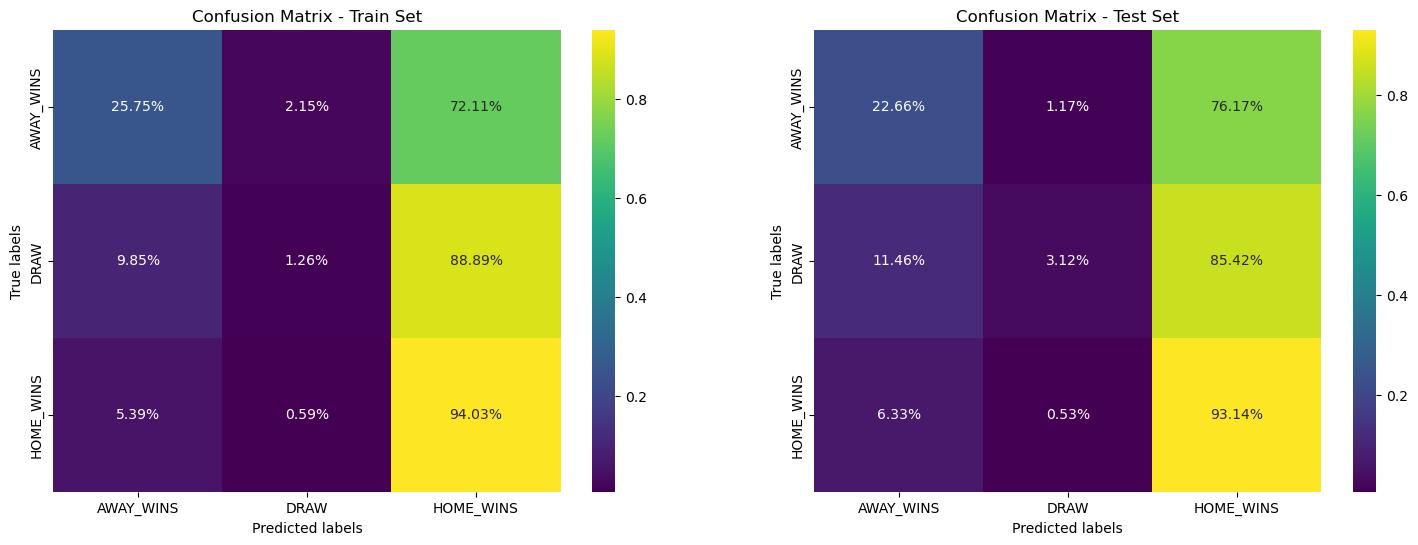

In [31]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices for train set
y_train_pred_new = convert_to_outcome_df(y_train_pred,X_train, lim_win= best_lim[0], lim_loss=best_lim[1])
confusion_pred1 = y_train_pred_new['HOME_WINS'] - y_train_pred_new['AWAY_WINS']
confusion_target1 = train_scores.loc[y_train_pred_new.index,'HOME_WINS'] - train_scores.loc[y_train_pred_new.index,'AWAY_WINS']
train_cm1 = confusion_matrix(confusion_target1, confusion_pred1,normalize='true')

# Compute confusion matrices for test set
confusion_pred2 = y_test_pred_new['HOME_WINS'] - y_test_pred_new['AWAY_WINS']
confusion_target2 = target['HOME_WINS'] - target['AWAY_WINS']
train_cm2 = confusion_matrix(confusion_target2, confusion_pred2,normalize='true')

# Plot confusion matrices using seaborn
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Train set confusion matrix
sns.heatmap(train_cm1, annot=True,xticklabels=["AWAY_WINS","DRAW","HOME_WINS"],yticklabels=["AWAY_WINS",'DRAW',"HOME_WINS"],fmt=".2%", cmap="viridis", ax=ax[0])
ax[0].set_title('Confusion Matrix - Train Set')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

# Test set confusion matrix
sns.heatmap(train_cm2, annot=True,xticklabels=["AWAY_WINS","DRAW","HOME_WINS"],yticklabels=["AWAY_WINS",'DRAW',"HOME_WINS"],fmt=".2%", cmap="viridis", ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.show()

###  $\color{blue}{\text{7. Create new features}}$

1. $\color{blue}{\text{Count how many HomeWins, Draw, AwayWins in our train set}}$

In [32]:
train_data2.loc[train_data2.isna().any(axis=1)]

Empty DataFrame
Columns: [HOME_TEAM_SHOTS_TOTAL_season_sum, HOME_TEAM_SHOTS_INSIDEBOX_season_sum, HOME_TEAM_SHOTS_OFF_TARGET_season_sum, HOME_TEAM_SHOTS_ON_TARGET_season_sum, HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum, HOME_TEAM_PASSES_season_sum, HOME_TEAM_SUCCESSFUL_PASSES_season_sum, HOME_TEAM_SAVES_season_sum, HOME_TEAM_CORNERS_season_sum, HOME_TEAM_FOULS_season_sum, HOME_TEAM_YELLOWCARDS_season_sum, HOME_TEAM_REDCARDS_season_sum, HOME_TEAM_OFFSIDES_season_sum, HOME_TEAM_ATTACKS_season_sum, HOME_TEAM_PENALTIES_season_sum, HOME_TEAM_SUBSTITUTIONS_season_sum, HOME_TEAM_BALL_SAFE_season_sum, HOME_TEAM_DANGEROUS_ATTACKS_season_sum, HOME_TEAM_INJURIES_season_sum, HOME_TEAM_GOALS_season_sum, HOME_TEAM_GAME_WON_season_sum, HOME_TEAM_GAME_DRAW_season_sum, HOME_TEAM_GAME_LOST_season_sum, HOME_TEAM_SHOTS_TOTAL_season_average, HOME_TEAM_SHOTS_INSIDEBOX_season_average, HOME_TEAM_SHOTS_OFF_TARGET_season_average, HOME_TEAM_SHOTS_ON_TARGET_season_average, HOME_TEAM_SHOTS_OUTSIDEBOX_season_average, HOME_TEAM_PASSES_season_average, HOME_TEAM_SUCCESSFUL_PASSES_season_average, HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average, HOME_TEAM_SAVES_season_average, HOME_TEAM_CORNERS_season_average, HOME_TEAM_BALL_POSSESSION_season_average, HOME_TEAM_FOULS_season_average, HOME_TEAM_YELLOWCARDS_season_average, HOME_TEAM_REDCARDS_season_average, HOME_TEAM_OFFSIDES_season_average, HOME_TEAM_ATTACKS_season_average, HOME_TEAM_PENALTIES_season_average, HOME_TEAM_SUBSTITUTIONS_season_average, HOME_TEAM_BALL_SAFE_season_average, HOME_TEAM_DANGEROUS_ATTACKS_season_average, HOME_TEAM_INJURIES_season_average, HOME_TEAM_GOALS_season_average, HOME_TEAM_GAME_WON_season_average, HOME_TEAM_GAME_DRAW_season_average, HOME_TEAM_GAME_LOST_season_average, HOME_TEAM_SHOTS_TOTAL_season_std, HOME_TEAM_SHOTS_INSIDEBOX_season_std, HOME_TEAM_SHOTS_OFF_TARGET_season_std, HOME_TEAM_SHOTS_ON_TARGET_season_std, HOME_TEAM_SHOTS_OUTSIDEBOX_season_std, HOME_TEAM_PASSES_season_std, HOME_TEAM_SUCCESSFUL_PASSES_season_std, HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std, HOME_TEAM_SAVES_season_std, HOME_TEAM_CORNERS_season_std, HOME_TEAM_BALL_POSSESSION_season_std, HOME_TEAM_FOULS_season_std, HOME_TEAM_YELLOWCARDS_season_std, HOME_TEAM_REDCARDS_season_std, HOME_TEAM_OFFSIDES_season_std, HOME_TEAM_ATTACKS_season_std, HOME_TEAM_PENALTIES_season_std, HOME_TEAM_SUBSTITUTIONS_season_std, HOME_TEAM_BALL_SAFE_season_std, HOME_TEAM_DANGEROUS_ATTACKS_season_std, HOME_TEAM_INJURIES_season_std, HOME_TEAM_GOALS_season_std, HOME_TEAM_SHOTS_TOTAL_5_last_match_sum, HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum, HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum, HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum, HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum, HOME_TEAM_PASSES_5_last_match_sum, HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum, HOME_TEAM_SAVES_5_last_match_sum, HOME_TEAM_CORNERS_5_last_match_sum, HOME_TEAM_FOULS_5_last_match_sum, HOME_TEAM_YELLOWCARDS_5_last_match_sum, HOME_TEAM_REDCARDS_5_last_match_sum, HOME_TEAM_OFFSIDES_5_last_match_sum, HOME_TEAM_ATTACKS_5_last_match_sum, HOME_TEAM_PENALTIES_5_last_match_sum, HOME_TEAM_SUBSTITUTIONS_5_last_match_sum, HOME_TEAM_BALL_SAFE_5_last_match_sum, HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum, HOME_TEAM_INJURIES_5_last_match_sum, HOME_TEAM_GOALS_5_last_match_sum, HOME_TEAM_GAME_WON_5_last_match_sum, HOME_TEAM_GAME_DRAW_5_last_match_sum, HOME_TEAM_GAME_LOST_5_last_match_sum, HOME_TEAM_SHOTS_TOTAL_5_last_match_average, HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average, HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average, HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average, HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average, HOME_TEAM_PASSES_5_last_match_average, HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average, ...]
Index: []

[0 rows x 420 columns]

In [33]:
display(train_scores)
display(New_train_scores)

HOME_WINS  DRAW  AWAY_WINS
ID                               
0              0     0          1
1              0     1          0
2              0     0          1
3              1     0          0
4              0     1          0
...          ...   ...        ...
12298          0     0          1
12299          0     0          1
12300          0     0          1
12301          1     0          0
12302          1     0          0

[12303 rows x 3 columns]

ID  GOAL_DIFF_HOME_AWAY
0          0                 -2.0
1          1                  0.0
2          2                 -1.0
3          3                  1.0
4          4                  0.0
...      ...                  ...
12298  12298                 -1.0
12299  12299                 -1.0
12300  12300                 -1.0
12301  12301                  3.0
12302  12302                  2.0

[12303 rows x 2 columns]

In [34]:
display(train_scores.value_counts())
display(train_scores.value_counts(normalize=True))

HOME_WINS  DRAW  AWAY_WINS
1          0     0            5356
0          0     1            3761
           1     0            3186
dtype: int64

HOME_WINS  DRAW  AWAY_WINS
1          0     0            0.435341
0          0     1            0.305698
           1     0            0.258961
dtype: float64

2. $\color{blue}{\text{Look if there some features correlated with a Draw}}$


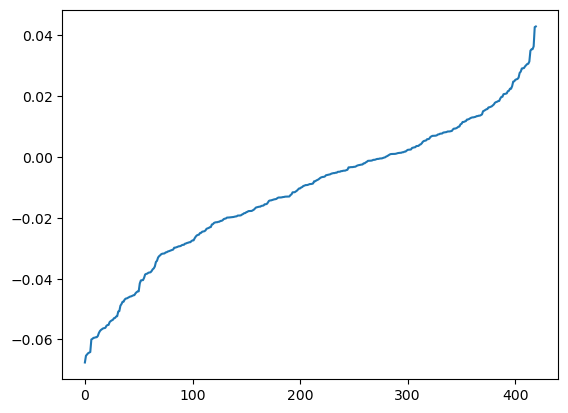

The features with highest positive correlation with draw are : 
  HOME_TEAM_GAME_DRAW_season_sum              0.036403
HOME_TEAM_GAME_LOST_season_sum              0.042744
HOME_TEAM_GAME_LOST_season_average          0.042956
DIFF_TEAM_GAME_LOST_5_last_match_sum        0.035461
DIFF_TEAM_GAME_LOST_5_last_match_average    0.035486
dtype: float64
The features with highest positive correlation with draw are : 
 HOME_TEAM_SHOTS_ON_TARGET_season_sum       -0.064299
HOME_TEAM_GOALS_season_sum                 -0.064920
HOME_TEAM_SHOTS_TOTAL_season_average       -0.065344
HOME_TEAM_SHOTS_INSIDEBOX_season_average   -0.064508
HOME_TEAM_SHOTS_ON_TARGET_season_average   -0.067558
dtype: float64


In [35]:
corr_draw = train_data2.corrwith(train_scores["DRAW"])
corr_draw.sort_values()\
        .plot(use_index=[])
plt.show()

pos_corr_draw = corr_draw[corr_draw > corr_draw.quantile(0.99)]
neg_corr_draw = corr_draw[corr_draw < corr_draw.quantile(0.01)]
print("The features with highest positive correlation with draw are : \n ", pos_corr_draw)
print("The features with highest positive correlation with draw are : \n", neg_corr_draw)

3. $\color{blue}{\text{Maybe create model and aggregate for the decision}}$


In [36]:
# We have no easy way to predict if it's a draw, as we don't have access to features with high correlation with draws and even by looking
# At some plot there is no evident pattern

In [37]:
train_data2[train_data2.isna().any(axis = 1)]

Empty DataFrame
Columns: [HOME_TEAM_SHOTS_TOTAL_season_sum, HOME_TEAM_SHOTS_INSIDEBOX_season_sum, HOME_TEAM_SHOTS_OFF_TARGET_season_sum, HOME_TEAM_SHOTS_ON_TARGET_season_sum, HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum, HOME_TEAM_PASSES_season_sum, HOME_TEAM_SUCCESSFUL_PASSES_season_sum, HOME_TEAM_SAVES_season_sum, HOME_TEAM_CORNERS_season_sum, HOME_TEAM_FOULS_season_sum, HOME_TEAM_YELLOWCARDS_season_sum, HOME_TEAM_REDCARDS_season_sum, HOME_TEAM_OFFSIDES_season_sum, HOME_TEAM_ATTACKS_season_sum, HOME_TEAM_PENALTIES_season_sum, HOME_TEAM_SUBSTITUTIONS_season_sum, HOME_TEAM_BALL_SAFE_season_sum, HOME_TEAM_DANGEROUS_ATTACKS_season_sum, HOME_TEAM_INJURIES_season_sum, HOME_TEAM_GOALS_season_sum, HOME_TEAM_GAME_WON_season_sum, HOME_TEAM_GAME_DRAW_season_sum, HOME_TEAM_GAME_LOST_season_sum, HOME_TEAM_SHOTS_TOTAL_season_average, HOME_TEAM_SHOTS_INSIDEBOX_season_average, HOME_TEAM_SHOTS_OFF_TARGET_season_average, HOME_TEAM_SHOTS_ON_TARGET_season_average, HOME_TEAM_SHOTS_OUTSIDEBOX_season_average, HOME_TEAM_PASSES_season_average, HOME_TEAM_SUCCESSFUL_PASSES_season_average, HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average, HOME_TEAM_SAVES_season_average, HOME_TEAM_CORNERS_season_average, HOME_TEAM_BALL_POSSESSION_season_average, HOME_TEAM_FOULS_season_average, HOME_TEAM_YELLOWCARDS_season_average, HOME_TEAM_REDCARDS_season_average, HOME_TEAM_OFFSIDES_season_average, HOME_TEAM_ATTACKS_season_average, HOME_TEAM_PENALTIES_season_average, HOME_TEAM_SUBSTITUTIONS_season_average, HOME_TEAM_BALL_SAFE_season_average, HOME_TEAM_DANGEROUS_ATTACKS_season_average, HOME_TEAM_INJURIES_season_average, HOME_TEAM_GOALS_season_average, HOME_TEAM_GAME_WON_season_average, HOME_TEAM_GAME_DRAW_season_average, HOME_TEAM_GAME_LOST_season_average, HOME_TEAM_SHOTS_TOTAL_season_std, HOME_TEAM_SHOTS_INSIDEBOX_season_std, HOME_TEAM_SHOTS_OFF_TARGET_season_std, HOME_TEAM_SHOTS_ON_TARGET_season_std, HOME_TEAM_SHOTS_OUTSIDEBOX_season_std, HOME_TEAM_PASSES_season_std, HOME_TEAM_SUCCESSFUL_PASSES_season_std, HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std, HOME_TEAM_SAVES_season_std, HOME_TEAM_CORNERS_season_std, HOME_TEAM_BALL_POSSESSION_season_std, HOME_TEAM_FOULS_season_std, HOME_TEAM_YELLOWCARDS_season_std, HOME_TEAM_REDCARDS_season_std, HOME_TEAM_OFFSIDES_season_std, HOME_TEAM_ATTACKS_season_std, HOME_TEAM_PENALTIES_season_std, HOME_TEAM_SUBSTITUTIONS_season_std, HOME_TEAM_BALL_SAFE_season_std, HOME_TEAM_DANGEROUS_ATTACKS_season_std, HOME_TEAM_INJURIES_season_std, HOME_TEAM_GOALS_season_std, HOME_TEAM_SHOTS_TOTAL_5_last_match_sum, HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_sum, HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum, HOME_TEAM_SHOTS_ON_TARGET_5_last_match_sum, HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum, HOME_TEAM_PASSES_5_last_match_sum, HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_sum, HOME_TEAM_SAVES_5_last_match_sum, HOME_TEAM_CORNERS_5_last_match_sum, HOME_TEAM_FOULS_5_last_match_sum, HOME_TEAM_YELLOWCARDS_5_last_match_sum, HOME_TEAM_REDCARDS_5_last_match_sum, HOME_TEAM_OFFSIDES_5_last_match_sum, HOME_TEAM_ATTACKS_5_last_match_sum, HOME_TEAM_PENALTIES_5_last_match_sum, HOME_TEAM_SUBSTITUTIONS_5_last_match_sum, HOME_TEAM_BALL_SAFE_5_last_match_sum, HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_sum, HOME_TEAM_INJURIES_5_last_match_sum, HOME_TEAM_GOALS_5_last_match_sum, HOME_TEAM_GAME_WON_5_last_match_sum, HOME_TEAM_GAME_DRAW_5_last_match_sum, HOME_TEAM_GAME_LOST_5_last_match_sum, HOME_TEAM_SHOTS_TOTAL_5_last_match_average, HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_average, HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_average, HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average, HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average, HOME_TEAM_PASSES_5_last_match_average, HOME_TEAM_SUCCESSFUL_PASSES_5_last_match_average, ...]
Index: []

[0 rows x 420 columns]

In [38]:
train_draw = train_scores.loc[train_data2.index,["DRAW"]]
train_draw.head()

DRAW
ID      
0      0
1      1
2      0
4      1
5      0

In [39]:
# train_data3 = new_features_V4(train_data2)
# # Calculate correlation between train_data3 and the 'Draw' column in Train_draw
# correlation = train_data3.corrwith(train_draw['DRAW'])

# # Get the 75th quantile of correlation values
# quantile_75 = correlation.abs().quantile(0.75)

# # Select features with correlation greater than the 75th quantile
# selected_features = correlation[correlation.abs() > quantile_75].index

# # Select only the features with high correlation from train_data3
# train_data3 = train_data3[selected_features]
# train_data3.shape

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.svm import SVC

# # Assuming train_data2 is your feature dataframe and train_draw is your target variable dataframe

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(train_data3, train_draw, test_size=0.2, random_state=42)

# # # Train a Logistic Regression model
# # lr_model = LogisticRegression()
# # lr_model.fit(X_train, y_train)
# # lr_preds = lr_model.predict(X_test)

# # # Train a Random Forest model
# # rf_model = RandomForestClassifier()
# # rf_model.fit(X_train, y_train)
# # rf_preds = rf_model.predict(X_test)

# # Train a Support Vector Machine (SVM) model
# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# svm_preds = svm_model.predict(X_test)

# # Define function to print confusion matrix
# def print_confusion_matrix(model_name, y_true, y_pred):
#     print(f"{model_name} Confusion Matrix:")
#     cm = confusion_matrix(y_true, y_pred)
#     print(cm)

# # # Evaluate the models
# # print("Logistic Regression Results:")
# # # print(classification_report(y_test, lr_preds))
# # print_confusion_matrix("Logistic Regression", y_test, lr_preds)

# # print("\nRandom Forest Results:")
# # # print(classification_report(y_test, rf_preds))
# # print_confusion_matrix("Random Forest", y_test, rf_preds)

# print("\nSupport Vector Machine Results:")
# print(classification_report(y_test, svm_preds))
# print_confusion_matrix("Support Vector Machine", y_test, svm_preds)


In [41]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Reshape the target variables to 1-dimensional arrays
# y_train_reshaped = y_train.values.ravel()
# y_test_reshaped = y_test.values.ravel()

# # Define a smaller parameter grid
# param_grid = {
#     'C': [0.1, 1],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# # Create the SVM model
# svm_model = SVC()

# # Perform grid search with cross-validation (reduced number of folds)
# grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid)
# grid_search.fit(X_train, y_train_reshaped)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Predict using the best model
# svm_best = grid_search.best_estimator_
# svm_preds = svm_best.predict(X_test)

# # Evaluate the best SVM model
# print("Best SVM Model Results:")
# print(classification_report(y_test_reshaped, svm_preds))

# # Print confusion matrix
# print_confusion_matrix("Best Support Vector Machine", y_test_reshaped, svm_preds)


4. $\color{blue}{\text{Create new features which will count how many values that are highly correlated with an away wins are positive}}$


In [42]:
train_data2

HOME_TEAM_SHOTS_TOTAL_season_sum  HOME_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                                                              
0                                   3.0                                   2.0   
1                                   6.0                                   8.0   
2                                   4.0                                   2.0   
4                                   3.0                                   3.0   
5                                   7.0                                   6.0   
...                                 ...                                   ...   
12295                               1.0                                   0.0   
12296                               0.0                                   0.0   
12299                               4.0                                   2.0   
12300                               4.0                                   3.0   
12302                               2.0                                   3.0   

       HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                             
0                                        5.0   
1                                        3.0   
2                                        5.0   
4                                        2.0   
5                                        9.0   
...                                      ...   
12295                                    0.0   
12296                                    0.0   
12299                                    3.0   
12300                                    5.0   
12302                                    1.0   

       HOME_TEAM_SHOTS_ON_TARGET_season_sum  \
ID                                            
0                                       2.0   
1                                       6.0   
2                                       2.0   
4                                       3.0   
5                                       5.0   
...                                     ...   
12295                                   1.0   
12296                                   0.0   
12299                                   1.0   
12300                                   3.0   
12302                                   2.0   

       HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum  HOME_TEAM_PASSES_season_sum  \
ID                                                                          
0                                        1.0                          2.0   
1                                        5.0                          8.0   
2                                        8.0                          1.0   
4                                        4.0                          4.0   
5                                       10.0                          8.0   
...                                      ...                          ...   
12295                                    2.0                          3.0   
12296                                    0.0                          8.0   
12299                                    5.0                          1.0   
12300                                    5.0                          1.0   
12302                                    2.0                          3.0   

       HOME_TEAM_SUCCESSFUL_PASSES_season_sum  HOME_TEAM_SAVES_season_sum  \
ID                                                                          
0                                         2.0                         5.0   
1                                         7.0                        10.0   
2                                         1.0                         2.0   
4                                         3.0                         4.0   
5                                         9.0                         5.0   
...                                       ...                         ...   
12295                                     3.0                         7.0   
12296                

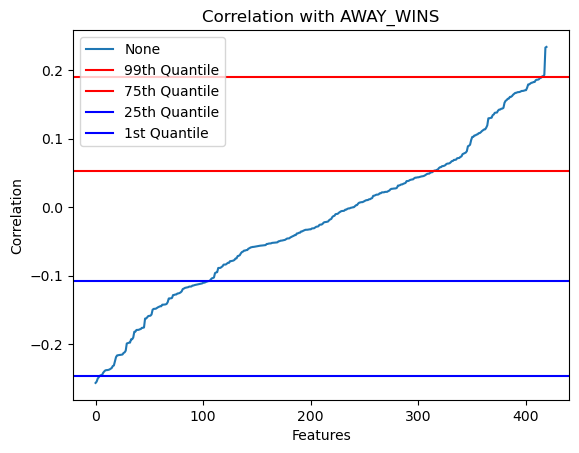

The features with highest positive correlation with AwayWins are : 
  AWAY_TEAM_SHOTS_INSIDEBOX_season_sum        0.191311
AWAY_TEAM_SHOTS_TOTAL_season_average        0.190873
AWAY_TEAM_SHOTS_INSIDEBOX_season_average    0.192951
DIFF_TEAM_GAME_LOST_season_sum              0.232928
DIFF_TEAM_GAME_LOST_season_average          0.233875
dtype: float64
The features with highest negative correlation with AwayWins are : 
 DIFF_TEAM_SHOTS_INSIDEBOX_season_sum       -0.254953
DIFF_TEAM_GAME_WON_season_sum              -0.248517
DIFF_TEAM_SHOTS_INSIDEBOX_season_average   -0.256877
DIFF_TEAM_BALL_POSSESSION_season_average   -0.246388
DIFF_TEAM_GAME_WON_season_average          -0.250565
dtype: float64


In [43]:
corr_away = train_data2.corrwith(train_scores["AWAY_WINS"])
pos_corr_away = corr_away[corr_away > corr_away.quantile(0.99)]
neg_corr_away = corr_away[corr_away < corr_away.quantile(0.01)]

quantile_99 = corr_away.quantile(0.99)
quantile_01 = corr_away.quantile(0.01)
quantile_25 = corr_away.quantile(0.25)
quantile_75 = corr_away.quantile(0.75)

# Plot the sorted correlation values
ax = corr_away.sort_values().plot(use_index=[])

# Add horizontal lines for the quantiles
plt.axhline(y=quantile_99, color='r', linestyle='-', label='99th Quantile')
plt.axhline(y=quantile_75, color='r', linestyle='-', label='75th Quantile')
plt.axhline(y=quantile_25, color='b', linestyle='-', label='25th Quantile')
plt.axhline(y=quantile_01, color='b', linestyle='-', label='1st Quantile')

# Add legend
plt.legend()

# Add title and labels if needed
plt.title('Correlation with AWAY_WINS')
plt.xlabel('Features')
plt.ylabel('Correlation')

# Show the plot
plt.show()

print("The features with highest positive correlation with AwayWins are : \n ", pos_corr_away)
print("The features with highest negative correlation with AwayWins are : \n", neg_corr_away)

In [44]:
def new_features_V1(data):
    # The first version will only use the most highly correlated features
    data_f = data.copy()

    # Create the new feature in one line
    data_f['NEW_feat1'] = data_f[pos_corr_away.index.to_list()].apply(lambda row: sum(-1 if x > 0 else 1 for x in row), axis=1)
    data_f['NEW_feat2'] = data_f[neg_corr_away.index.to_list()].apply(lambda row: sum(1 if x > 0 else -1 for x in row), axis=1)
    data_f['NEW_feat'] = data_f['NEW_feat1'] + data_f['NEW_feat2']

    return data_f

def new_features_V2(data):
    # The first version will only use the most highly correlated features
    data_f = data.copy()

    # Create the new feature in one line
    # data_f['NEW_feat1'] = data_f[pos_corr_away.index.to_list()].apply(lambda row: sum(-1 if x > 0 else 1 for x in row), axis=1)
    data_f['NEW_feat2'] = data_f[neg_corr_away.index.to_list()].apply(lambda row: sum(1 if x > 0 else -1 for x in row), axis=1)
    data_f['NEW_feat'] = data_f['NEW_feat2']

    return data_f

def new_features_V3(data):
    # The first version will only use the most highly correlated features
    data_f = data.copy()

    # Create the new features in one line
    data_f['NEW_feat1'] = (data_f[pos_corr_away.index] * pos_corr_away.values).sum(axis=1)
    data_f['NEW_feat2'] = (data_f[neg_corr_away.index] * neg_corr_away.values).sum(axis=1)
    data_f['NEW_feat'] = data_f['NEW_feat1'] + data_f['NEW_feat2']

    return data_f

def new_features_V4(data):
    # The first version will only use the most highly correlated features
    data_f = data.copy()

    # pos_corr_away = corr_away[(corr_away.quantile(0.75)< corr_away) & (corr_away < corr_away.quantile(0.99))]
    # neg_corr_away = corr_away[(corr_away.quantile(0.01)< corr_away) & (corr_away < corr_away.quantile(0.25))]
    pos_corr_away = corr_away[(corr_away.quantile(0.75)< corr_away)]
    neg_corr_away = corr_away[(corr_away < corr_away.quantile(0.25))]

    # Create the new features in one line
    data_f['NEW_feat1'] = (data_f[pos_corr_away.index] * pos_corr_away.values).sum(axis=1)
    data_f['NEW_feat2'] = (data_f[neg_corr_away.index] * neg_corr_away.values).sum(axis=1)
    data_f['NEW_feat'] = data_f['NEW_feat1'] + data_f['NEW_feat2']
    del data_f["NEW_feat1"]
    del data_f["NEW_feat2"]

    return data_f

def new_features_V5(data):
    # The first version will only use the most highly correlated features
    data_f = data.copy()

    # pos_corr_away = corr_away[(corr_away.quantile(0.75)< corr_away) & (corr_away < corr_away.quantile(0.99))]
    # neg_corr_away = corr_away[(corr_away.quantile(0.01)< corr_away) & (corr_away < corr_away.quantile(0.25))]
    pos_corr_away = corr_away[(corr_away.quantile(0.75)< corr_away)]
    neg_corr_away = corr_away[(corr_away < corr_away.quantile(0.25))]

    # Create the new features in one line
    data_f['NEW_feat1'] = (data_f[pos_corr_away.index]**(1/2)* pos_corr_away.values\
                           #+ data_f[pos_corr_away.index] * pos_corr_away.values\
                            ).sum(axis=1)
    data_f['NEW_feat2'] = (data_f[neg_corr_away.index]**(1/2) * neg_corr_away.values\
                           #+ data_f[neg_corr_away.index] * neg_corr_away.values\
                            ).sum(axis=1)
    data_f['NEW_feat'] = data_f['NEW_feat1'] + data_f['NEW_feat2']

    return data_f

print("VERSION 1 : ", new_features_V1(train_data2).iloc[:,[-1]].corrwith(train_scores["AWAY_WINS"]))
print("VERSION 2 : ", new_features_V2(train_data2).iloc[:,[-1]].corrwith(train_scores["AWAY_WINS"]))
print("VERSION 3 : ", new_features_V3(train_data2).iloc[:,[-1]].corrwith(train_scores["AWAY_WINS"]))
print("VERSION 4 : ", new_features_V4(train_data2).iloc[:,[-1]].corrwith(train_scores["AWAY_WINS"]))
print("VERSION 5 : ", new_features_V5(train_data2).iloc[:,[-1]].corrwith(train_scores["AWAY_WINS"]))

VERSION 1 :  NEW_feat   -0.264049
dtype: float64
VERSION 2 :  NEW_feat   -0.252867
dtype: float64
VERSION 3 :  NEW_feat    0.297464
dtype: float64
VERSION 4 :  NEW_feat    0.301019
dtype: float64
VERSION 5 :  NEW_feat    0.286548
dtype: float64


In [45]:
columns_away = pos_corr_away.index.union(neg_corr_away.index)

In [46]:
columns_away.to_list()

['AWAY_TEAM_SHOTS_INSIDEBOX_season_average',
 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum',
 'AWAY_TEAM_SHOTS_TOTAL_season_average',
 'DIFF_TEAM_BALL_POSSESSION_season_average',
 'DIFF_TEAM_GAME_LOST_season_average',
 'DIFF_TEAM_GAME_LOST_season_sum',
 'DIFF_TEAM_GAME_WON_season_average',
 'DIFF_TEAM_GAME_WON_season_sum',
 'DIFF_TEAM_SHOTS_INSIDEBOX_season_average',
 'DIFF_TEAM_SHOTS_INSIDEBOX_season_sum']

In [47]:
print(train_data2.corrwith(train_scores["AWAY_WINS"]).sort_values()[-1:-4:-1])
print(train_data2.corrwith(train_scores["AWAY_WINS"]).sort_values()[:6])

DIFF_TEAM_GAME_LOST_season_average          0.233875
DIFF_TEAM_GAME_LOST_season_sum              0.232928
AWAY_TEAM_SHOTS_INSIDEBOX_season_average    0.192951
dtype: float64
DIFF_TEAM_SHOTS_INSIDEBOX_season_average   -0.256877
DIFF_TEAM_SHOTS_INSIDEBOX_season_sum       -0.254953
DIFF_TEAM_GAME_WON_season_average          -0.250565
DIFF_TEAM_GAME_WON_season_sum              -0.248517
DIFF_TEAM_BALL_POSSESSION_season_average   -0.246388
DIFF_TEAM_SHOTS_ON_TARGET_season_average   -0.245551
dtype: float64


5. $\color{blue}{\text{-Then do some study on the rows that are misclassified, look how the new features look.}}$ $\\$
 $\color{blue}{\text{- Maybe do normalization of the new features, before you fit another model}}$

In [48]:
from IPython.display import display, HTML

confusion_pred1 = confusion_pred1.to_frame().rename(columns = { 0: 'Pred_train'})
confusion_pred2 = confusion_pred2.to_frame().rename(columns = { 0: 'Pred_test'})
confusion_target1 = confusion_target1.to_frame().rename(columns= {0: 'Target_train'})
confusion_target2 = confusion_target2.to_frame().rename(columns= {0: 'Target_test'})


# Function to display two DataFrames side by side
def display_side_by_side(df1, df2):
    df1_html = df1.head(10).to_html()
    df2_html = df2.head(10).to_html()
    display(HTML(f'<div style="display: flex;">'
                 f'<div style="margin-right: 20px;">{df1_html}</div>'
                 f'<div>{df2_html}</div>'
                 f'</div>'))

# Use the function to display the DataFrames
print("This is our prediction and target on the train set")
display_side_by_side(confusion_pred1, confusion_target1)
print("This is our prediction and target on the test set")
display_side_by_side(confusion_pred2, confusion_target2)

This is our prediction and target on the train set


This is our prediction and target on the test set


In [49]:
# First let's look at the train set, look at those who are classified as AwayWins (-1) and are in reality HomeWins

confusion_data1 = pd.merge(confusion_pred1,confusion_target1, left_index=True, right_index=True)
confusion_data2 = pd.merge(confusion_pred2,confusion_target2, left_index=True, right_index=True)

type1_error = confusion_data1[(confusion_data1["Pred_train"] == -1) & (confusion_data1["Target_train"] == 1)].index
TrueP = confusion_data1[(confusion_data1["Pred_train"] == 1) & (confusion_data1["Target_train"] == 1)].index
TrueN = confusion_data1[(confusion_data1["Pred_train"] == -1) & (confusion_data1["Target_train"] == -1)].index

display(new_features_V4(train_data2).loc[type1_error, pos_corr_away.index.to_list() + ["NEW_feat"]])
display(new_features_V4(train_data2).loc[type1_error, neg_corr_away.index])

AWAY_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                            
4412                                    8.0   
8602                                    6.0   
5970                                    7.0   
10988                                   5.0   
7630                                    7.0   
...                                     ...   
2194                                    8.0   
613                                     6.0   
10636                                   6.0   
2302                                    8.0   
5977                                    7.0   

       AWAY_TEAM_SHOTS_TOTAL_season_average  \
ID                                            
4412                                    8.0   
8602                                    7.0   
5970                                    3.0   
10988                                   5.0   
7630                                    5.0   
...                                     ...   
2194                                    5.0   
613                                     6.0   
10636                                   6.0   
2302                                    9.0   
5977                                    7.0   

       AWAY_TEAM_SHOTS_INSIDEBOX_season_average  \
ID                                                
4412                                        7.0   
8602                                        6.0   
5970                                        4.0   
10988                                       6.0   
7630                                        7.0   
...                                         ...   
2194                                        7.0   
613                                         6.0   
10636                                       5.0   
2302                                        8.0   
5977                                        8.0   

       DIFF_TEAM_GAME_LOST_season_sum  DIFF_TEAM_GAME_LOST_season_average  \
ID                                                                          
4412                              5.0                                 4.0   
8602                              5.0                                 5.0   
5970                              4.0                                 4.0   
10988                            10.0                                10.0   
7630                              5.0                                 5.0   
...                               ...                                 ...   
2194                              5.0                                 5.0   
613                               6.0                                 6.0   
10636                             3.0                                 4.0   
2302                              5.0                                 5.0   
5977                              4.0                                 5.0   

         NEW_feat  
ID                 
4412   110.479274  
8602   129.062863  
5970    82.476621  
10988  114.639118  
7630    72.206481  
...           ...  
2194    95.536220  
613    147.712311  
10636  101.442861  
2302   141.164161  
5977    86.223100  

[175 rows x 6 columns]

DIFF_TEAM_SHOTS_INSIDEBOX_season_sum  DIFF_TEAM_GAME_WON_season_sum  \
ID                                                                           
4412                                   -4.0                           -4.0   
8602                                   -4.0                           -4.0   
5970                                   -4.0                           -6.0   
10988                                  -1.0                           -7.0   
7630                                   -6.0                           -6.0   
...                                     ...                            ...   
2194                                   -7.0                           -5.0   
613                                    -6.0                           -6.0   
10636                                  -5.0                           -2.0   
2302                                   -7.0                           -7.0   
5977                                   -4.0                           -2.0   

       DIFF_TEAM_SHOTS_INSIDEBOX_season_average  \
ID                                                
4412                                       -4.0   
8602                                       -4.0   
5970                                       -3.0   
10988                                      -2.0   
7630                                       -6.0   
...                                         ...   
2194                                       -6.0   
613                                        -6.0   
10636                                      -5.0   
2302                                       -8.0   
5977                                       -6.0   

       DIFF_TEAM_BALL_POSSESSION_season_average  \
ID                                                
4412                                       -7.0   
8602                                       -6.0   
5970                                       -4.0   
10988                                      -7.0   
7630                                       -3.0   
...                                         ...   
2194                                       -4.0   
613                                        -5.0   
10636                                      -7.0   
2302                                       -4.0   
5977                                       -5.0   

       DIFF_TEAM_GAME_WON_season_average  
ID                                        
4412                                -5.0  
8602                                -4.0  
5970                                -6.0  
10988                               -7.0  
7630                                -6.0  
...                                  ...  
2194                                -4.0  
613                                 -6.0  
10636                               -1.0  
2302                                -7.0  
5977                                -2.0  

[175 rows x 5 columns]

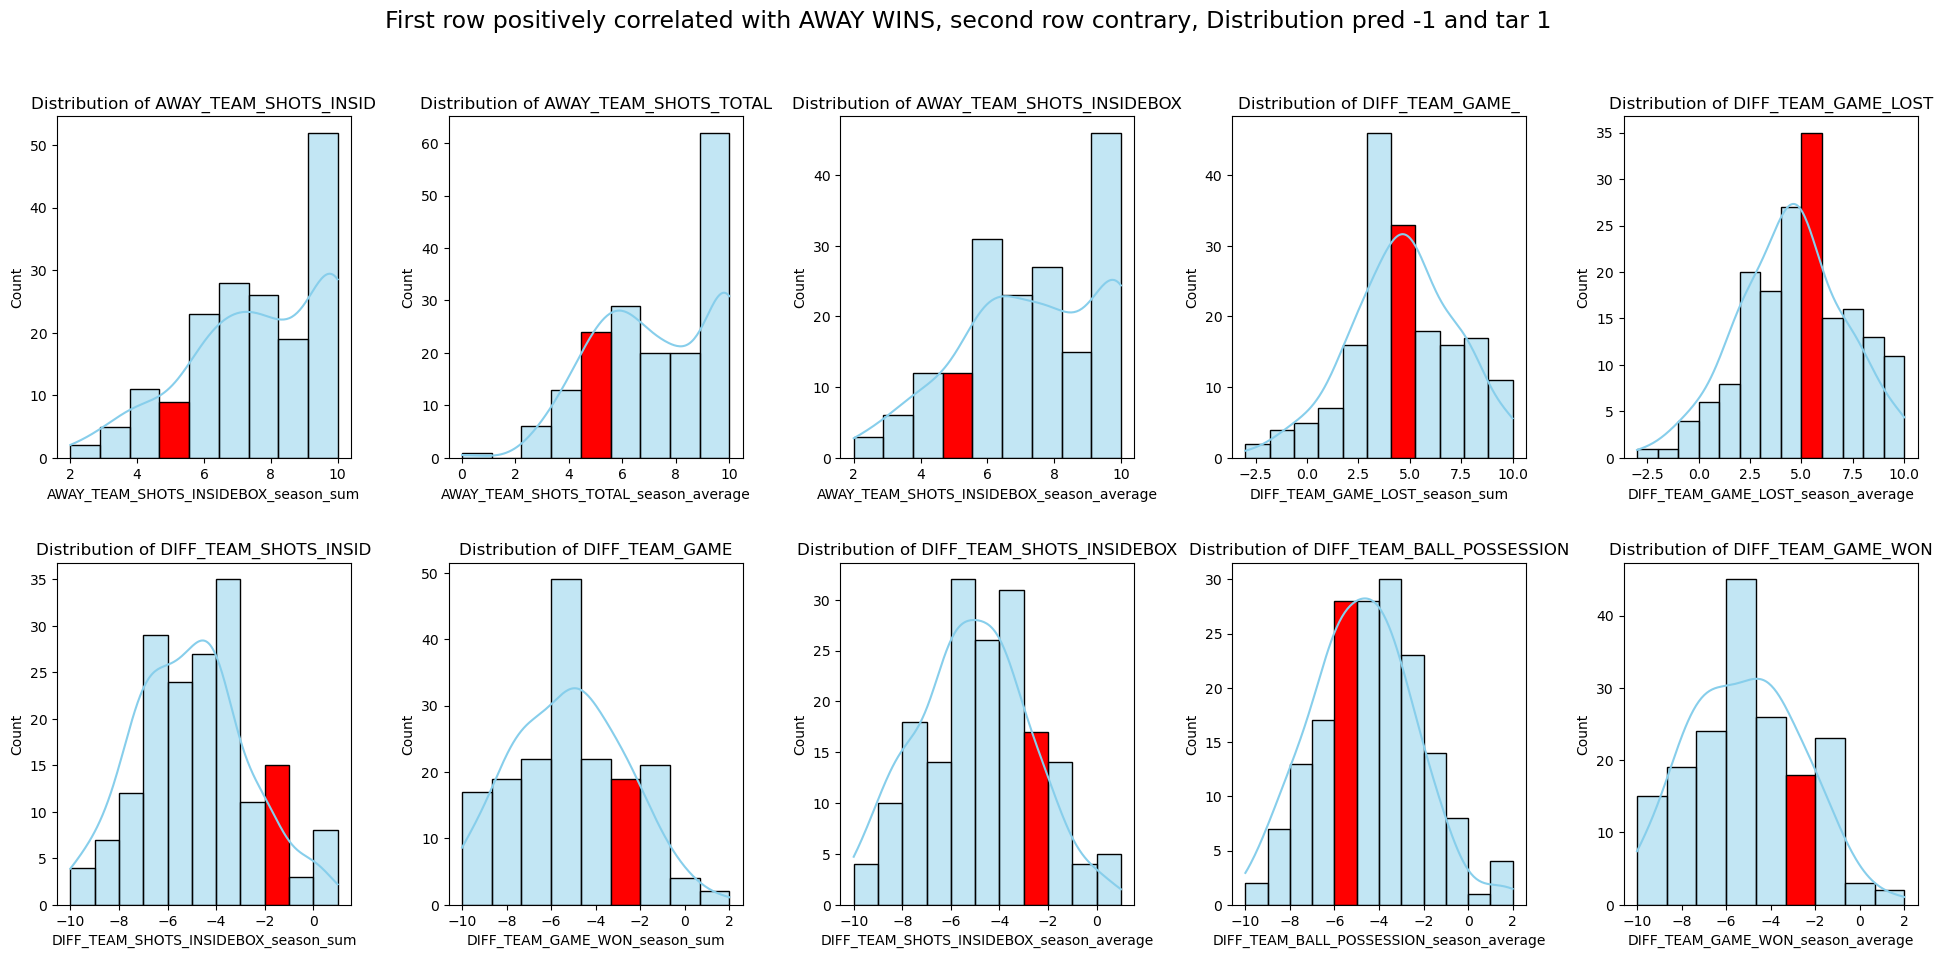

In [52]:
def View_Important_features(mask, new_feat = True):

    if new_feat:
        df_pos = new_features_V4(train_data2).loc[mask, pos_corr_away.index.to_list() + ["NEW_feat"]]
        df_neg = new_features_V4(train_data2).loc[mask, neg_corr_away.index.to_list() + ["NEW_feat"]]
        n= 6
    else :
        df_pos = new_features_V4(train_data2).loc[mask, pos_corr_away.index]
        df_neg = new_features_V4(train_data2).loc[mask, neg_corr_away.index]
        n= 5


    # Sample a random row from train_data2
    random_row = new_features_V4(train_data2).loc[mask].sample(n=1)

    
    # Plotting the distributions
    fig, axes = plt.subplots(2, n, figsize=(20, 10))

    # Plot distributions for df_pos
    for i, column in enumerate(df_pos.columns):
        sns.histplot(df_pos[column], kde=True, ax=axes[0, i], color='skyblue')
        axes[0, i].set_title(f'Distribution of {column[:-15]}')

        # Get the bins of the current histogram
        n, bins, patches = axes[0, i].hist(df_pos[column], bins='auto', alpha=0)
        
        # Find the bin index where the sample would belong
        for j in range(len(bins)-1):
            if bins[j] <= random_row[column].values[0] < bins[j+1]:
                bin_index = j
                break
        
        # Change the color of the bin corresponding to the sample
        axes[0, i].patches[bin_index].set_facecolor('red')

    # Plot distributions for df_neg
    for i, column in enumerate(df_neg.columns):
        sns.histplot(df_neg[column], kde=True, ax=axes[1, i], color='skyblue')
        axes[1, i].set_title(f'Distribution of {column[:-15]}')

        # Get the bins of the current histogram
        n, bins, patches = axes[1, i].hist(df_neg[column], bins='auto', alpha=0)
        
        # Find the bin index where the sample would belong
        for j in range(len(bins)-1):
            if bins[j] <= random_row[column].values[0] < bins[j+1]:
                bin_index = j
                break
        
        # Change the color of the bin corresponding to the sample
        axes[1, i].patches[bin_index].set_facecolor('red')

View_Important_features(type1_error,False)
# Adjust layout
# Set a title for the whole figure
plt.suptitle('First row positively correlated with AWAY WINS, second row contrary, Distribution pred -1 and tar 1', fontsize = 17)
plt.tight_layout(pad=3.0)
plt.show()


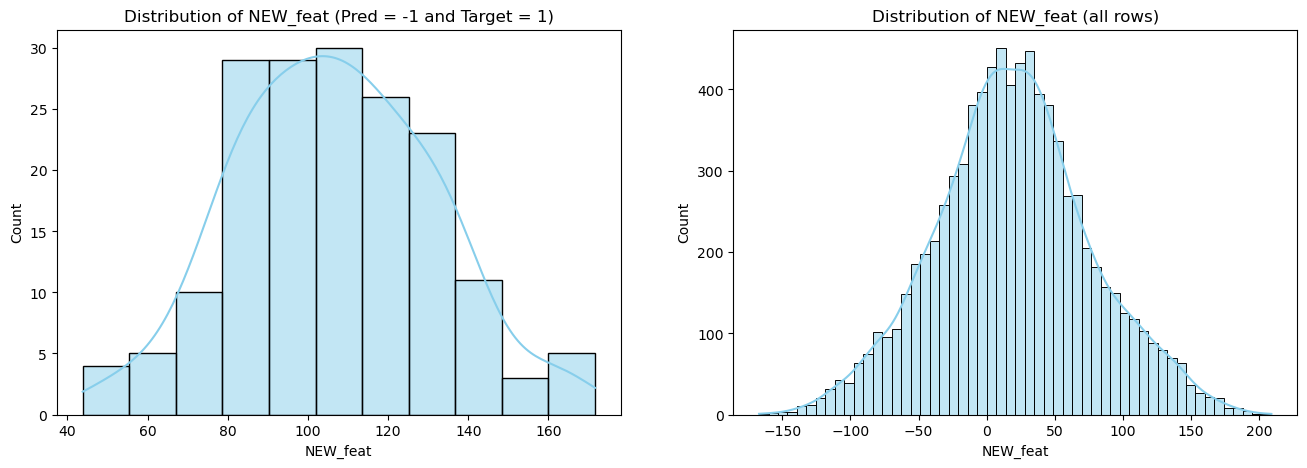

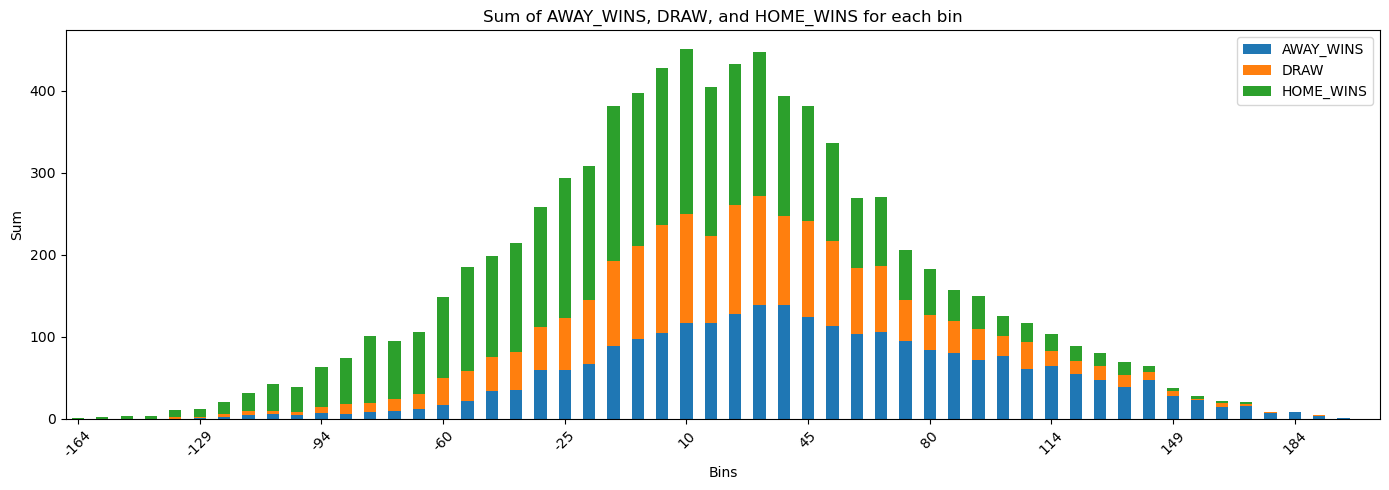

In [53]:
# Generate the DataFrame with new features
df_with_new_features = new_features_V4(train_data2)

df_with_new_features = pd.merge(df_with_new_features,train_scores, left_index=True,right_index=True)

# Define the columns to sum
columns_to_sum = ["AWAY_WINS", "DRAW", "HOME_WINS"]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the distribution of "NEW_feat" for rows filtered by type1_error
sns.histplot(df_with_new_features.loc[type1_error, "NEW_feat"], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of NEW_feat (Pred = -1 and Target = 1)')

# Plot the distribution of "NEW_feat" for all rows
sns.histplot(df_with_new_features["NEW_feat"], kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of NEW_feat (all rows)')

# Get the histogram data for all rows
n, bins, patches = axes[1].hist(df_with_new_features["NEW_feat"], bins='auto', alpha=0)

# Initialize a DataFrame to store the sums
sum_df = pd.DataFrame(columns=columns_to_sum)

# Calculate the sum of the specified columns for each bin
for j in range(len(bins)-1):
    bin_indices = df_with_new_features[(df_with_new_features["NEW_feat"] >= bins[j]) & 
                                       (df_with_new_features["NEW_feat"] < bins[j+1])].index
    bin_sum = df_with_new_features.loc[bin_indices, columns_to_sum].sum()
    sum_df = sum_df.append(bin_sum, ignore_index=True)


# Optionally, you can plot the sums to visualize them
fig, ax = plt.subplots(figsize=(14, 5))
sum_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Sum of AWAY_WINS, DRAW, and HOME_WINS for each bin')
ax.set_xlabel('Bins')
ax.set_ylabel('Sum')

# Set x-ticks to be a subset of the integer mid-points from the second plot
bin_midpoints = [(bins[j] + bins[j+1]) // 2 for j in range(len(bins)-1)]
tick_step = max(len(bin_midpoints) // 10, 1)  # Set the tick step to display every 10th tick
selected_ticks = bin_midpoints[::tick_step]  # Select a subset of ticks
selected_labels = [f'{int(midpoint)}' for midpoint in selected_ticks]  # Convert to string labels
ax.set_xticks(range(0, len(bin_midpoints), tick_step))
ax.set_xticklabels(selected_labels, rotation=45)

plt.tight_layout()
plt.show()

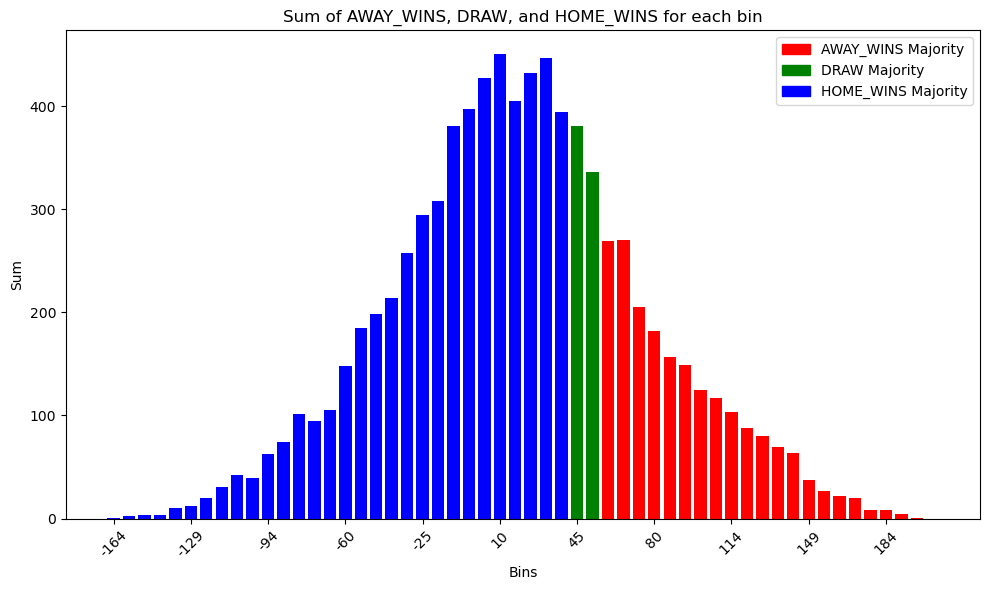

In [54]:
# Define the columns to sum
columns_to_sum = ["AWAY_WINS", "DRAW", "HOME_WINS"]

# Convert the columns to integer type
sum_df[columns_to_sum] = sum_df[columns_to_sum].astype(int)

# Create the new feature to identify the majority outcome
sum_df['Majority'] = sum_df[columns_to_sum].idxmax(axis=1)

# Define a color map for the majority outcome
color_map = {'AWAY_WINS': 'red', 'DRAW': 'green', 'HOME_WINS': 'blue'}
sum_df['Color'] = sum_df['Majority'].map(color_map)

# Assuming threshold_ratio is the threshold value you want to use
threshold_ratio = 0.7

# Calculate the total sum across the three columns
sum_df['Total'] = sum_df[columns_to_sum].sum(axis=1)
# Calculate the ratio of "DRAW" compared to the total sum
sum_df['DrawRatio'] = sum_df['DRAW'] / sum_df['Total']
sum_df['WINRatio'] = sum_df['HOME_WINS'] / sum_df['Total']
sum_df['LOSERatio'] = sum_df["AWAY_WINS"] / sum_df['Total']

# Assign colors based on the condition
sum_df['Color'] = np.where((sum_df['DrawRatio'] > sum_df["WINRatio"]-0.07) & (sum_df['DrawRatio'] > sum_df["LOSERatio"]-0.07) & (abs(sum_df.index.to_numpy()-30) < 25), 'green', sum_df['Majority'].map(color_map))
# sum_df['Color'] = np.where((sum_df['DrawRatio'] > 0.27) & (abs(sum_df.index.to_numpy()-30) < 25), 'green', sum_df['Majority'].map(color_map))

# Plot the sums with coloring based on the majority outcome
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with each bar colored based on the majority outcome
bars = ax.bar(range(len(sum_df)), sum_df[columns_to_sum].sum(axis=1), color=sum_df['Color'])

# Define the labels for the legend
legend_labels = {'AWAY_WINS': 'AWAY_WINS Majority', 'DRAW': 'DRAW Majority', 'HOME_WINS': 'HOME_WINS Majority'}

# Create a legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
legend_labels = [label for label in legend_labels.values()]
ax.legend(legend_handles, legend_labels)

ax.set_title('Sum of AWAY_WINS, DRAW, and HOME_WINS for each bin')
ax.set_xlabel('Bins')
ax.set_ylabel('Sum')

# Set x-ticks to be a subset of the integer mid-points from the second plot
tick_step = max(len(bin_midpoints) // 10, 1)  # Set the tick step to display fewer ticks
selected_ticks = range(0, len(bin_midpoints), tick_step)  # Select a subset of ticks
selected_labels = [f'{int(bin_midpoints[j])}' for j in selected_ticks]  # Convert to string labels

ax.set_xticks(selected_ticks)
ax.set_xticklabels(selected_labels, rotation=45)

plt.tight_layout()
plt.show()


In [55]:
# Now let's look at type 2 error

type2_error = confusion_data1[(confusion_data1["Pred_train"] == 1) & (confusion_data1["Target_train"] == -1)].index

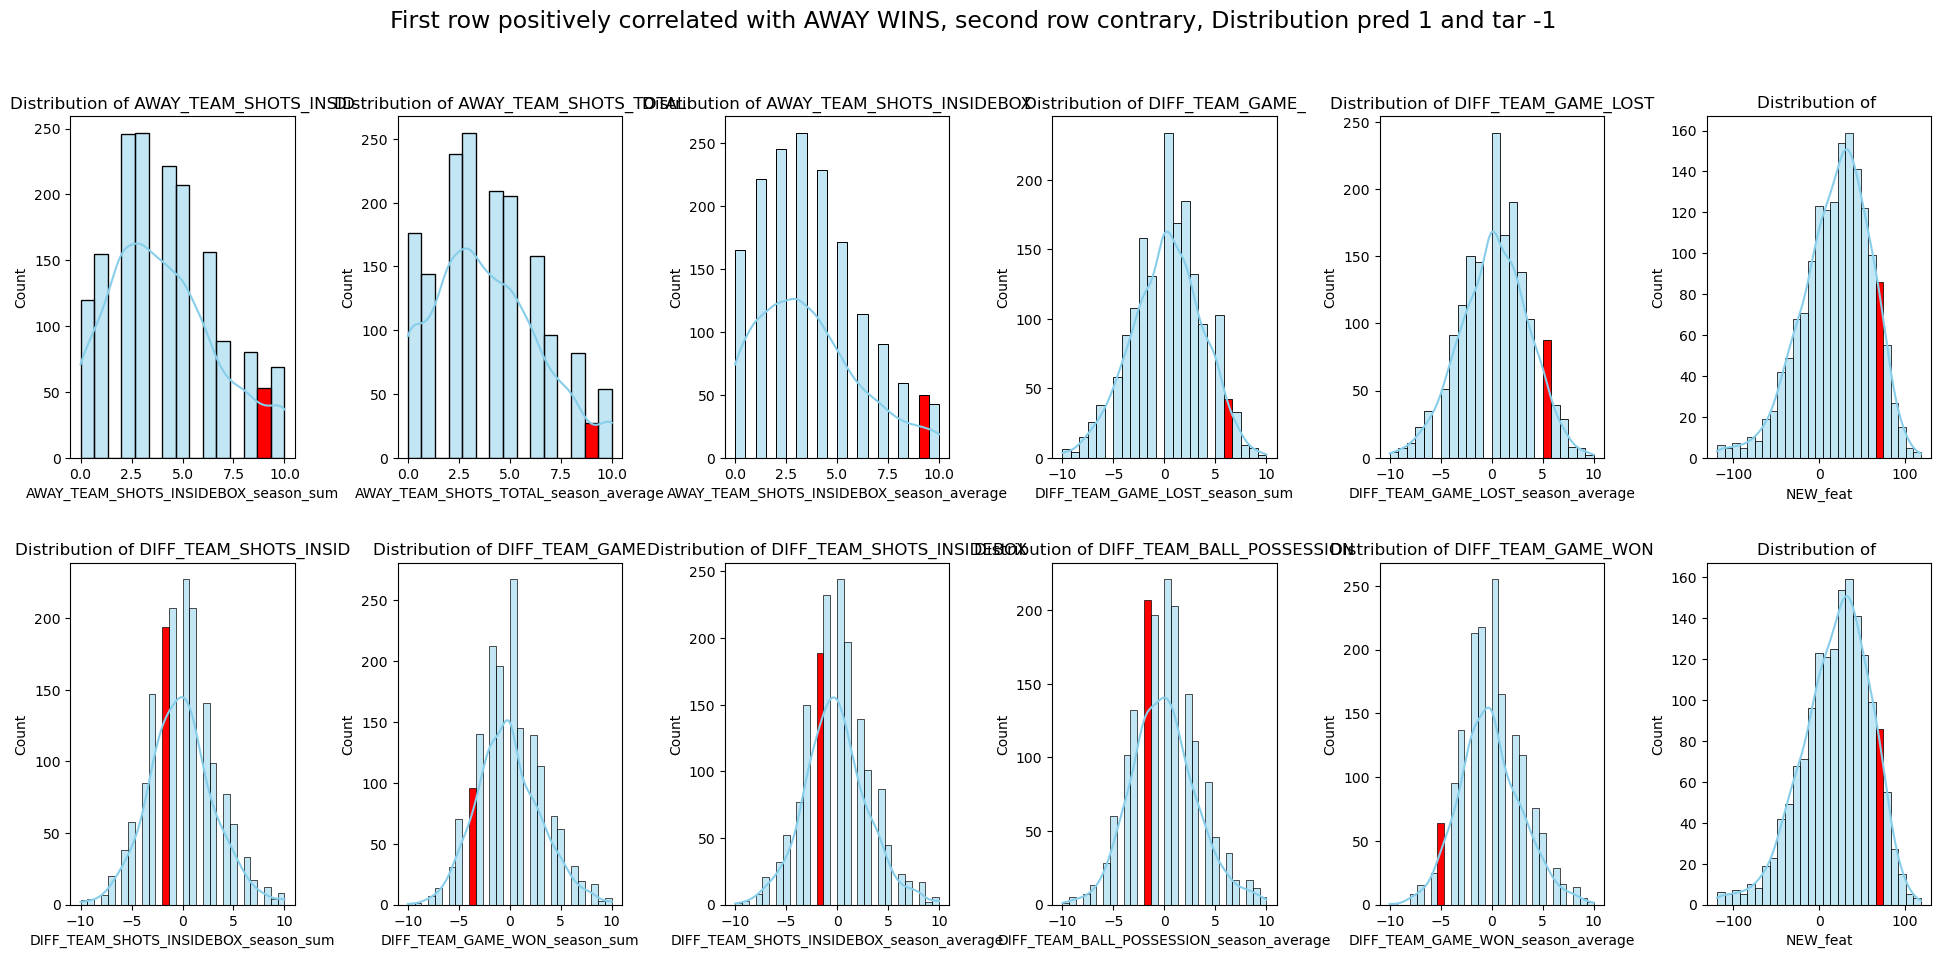

In [56]:
View_Important_features(type2_error)

# Adjust layout
plt.suptitle('First row positively correlated with AWAY WINS, second row contrary, Distribution pred 1 and tar -1', fontsize = 17)
plt.tight_layout(pad=3.0)
plt.show()

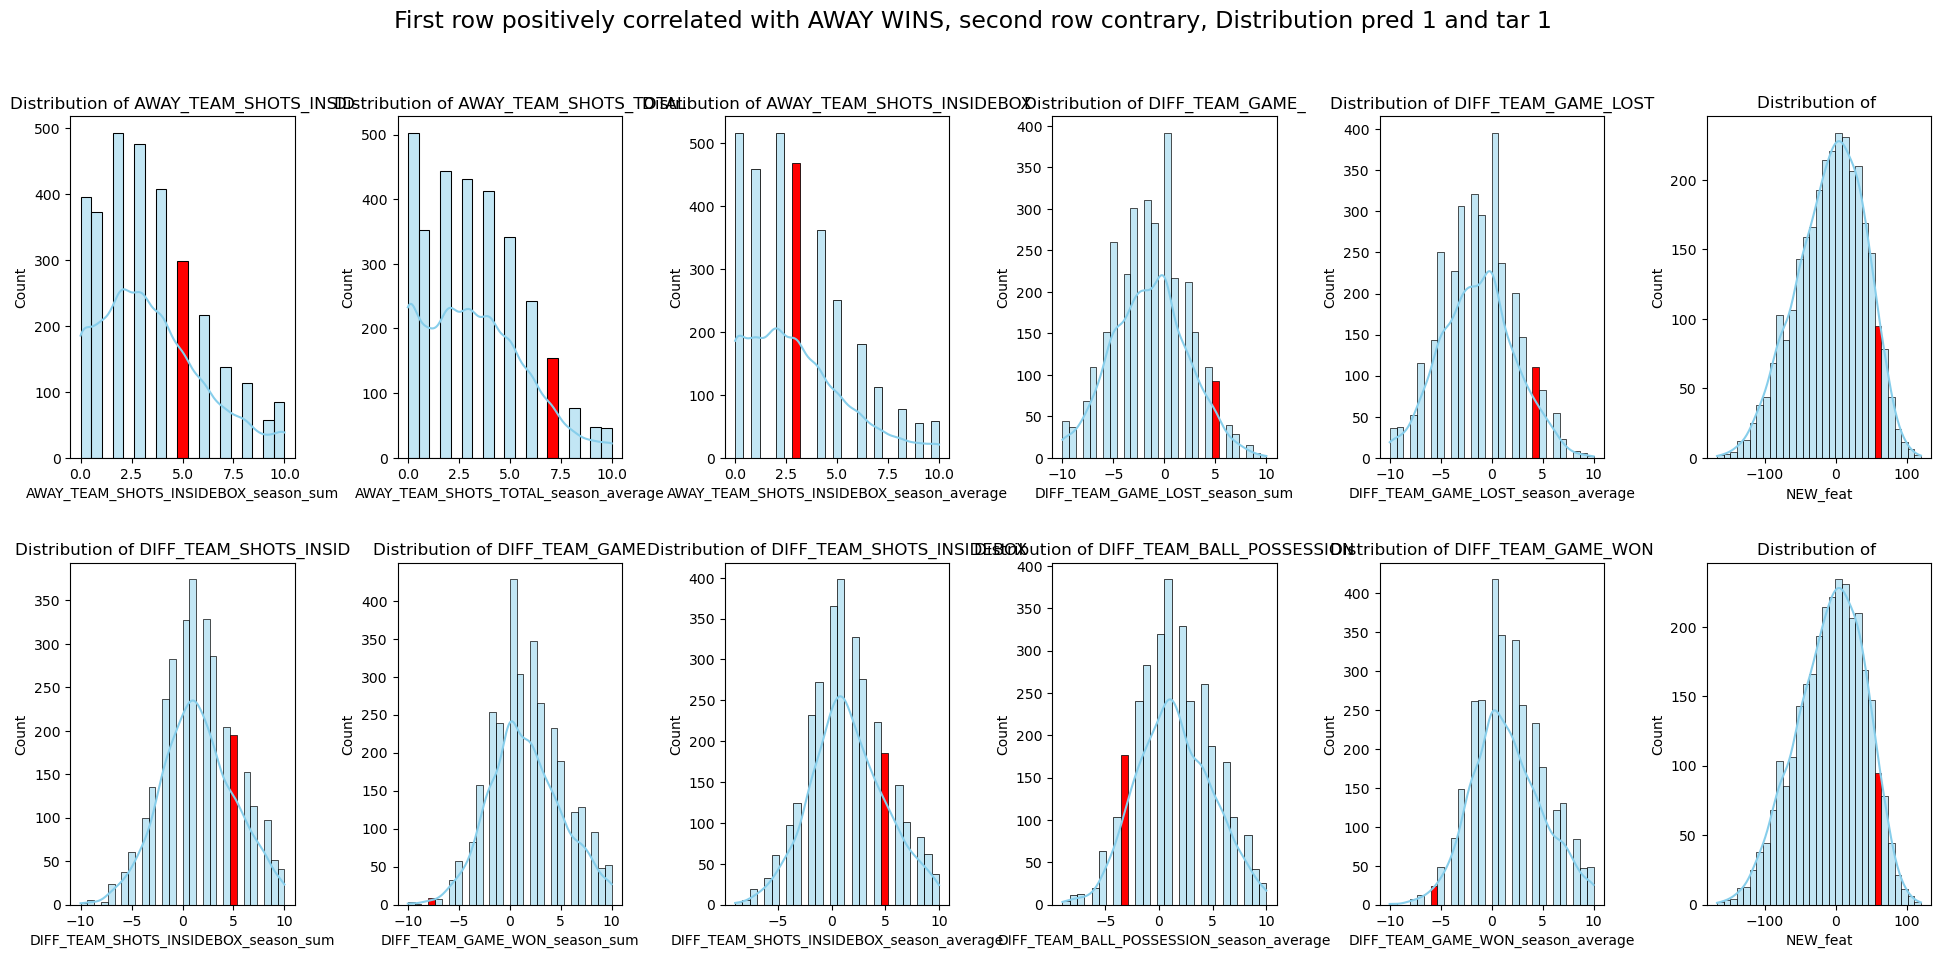

In [57]:
# Now let's look at true positive
View_Important_features(TrueP)

# Adjust layout
plt.suptitle('First row positively correlated with AWAY WINS, second row contrary, Distribution pred 1 and tar 1', fontsize = 17)
plt.tight_layout(pad=3.0)
plt.show()

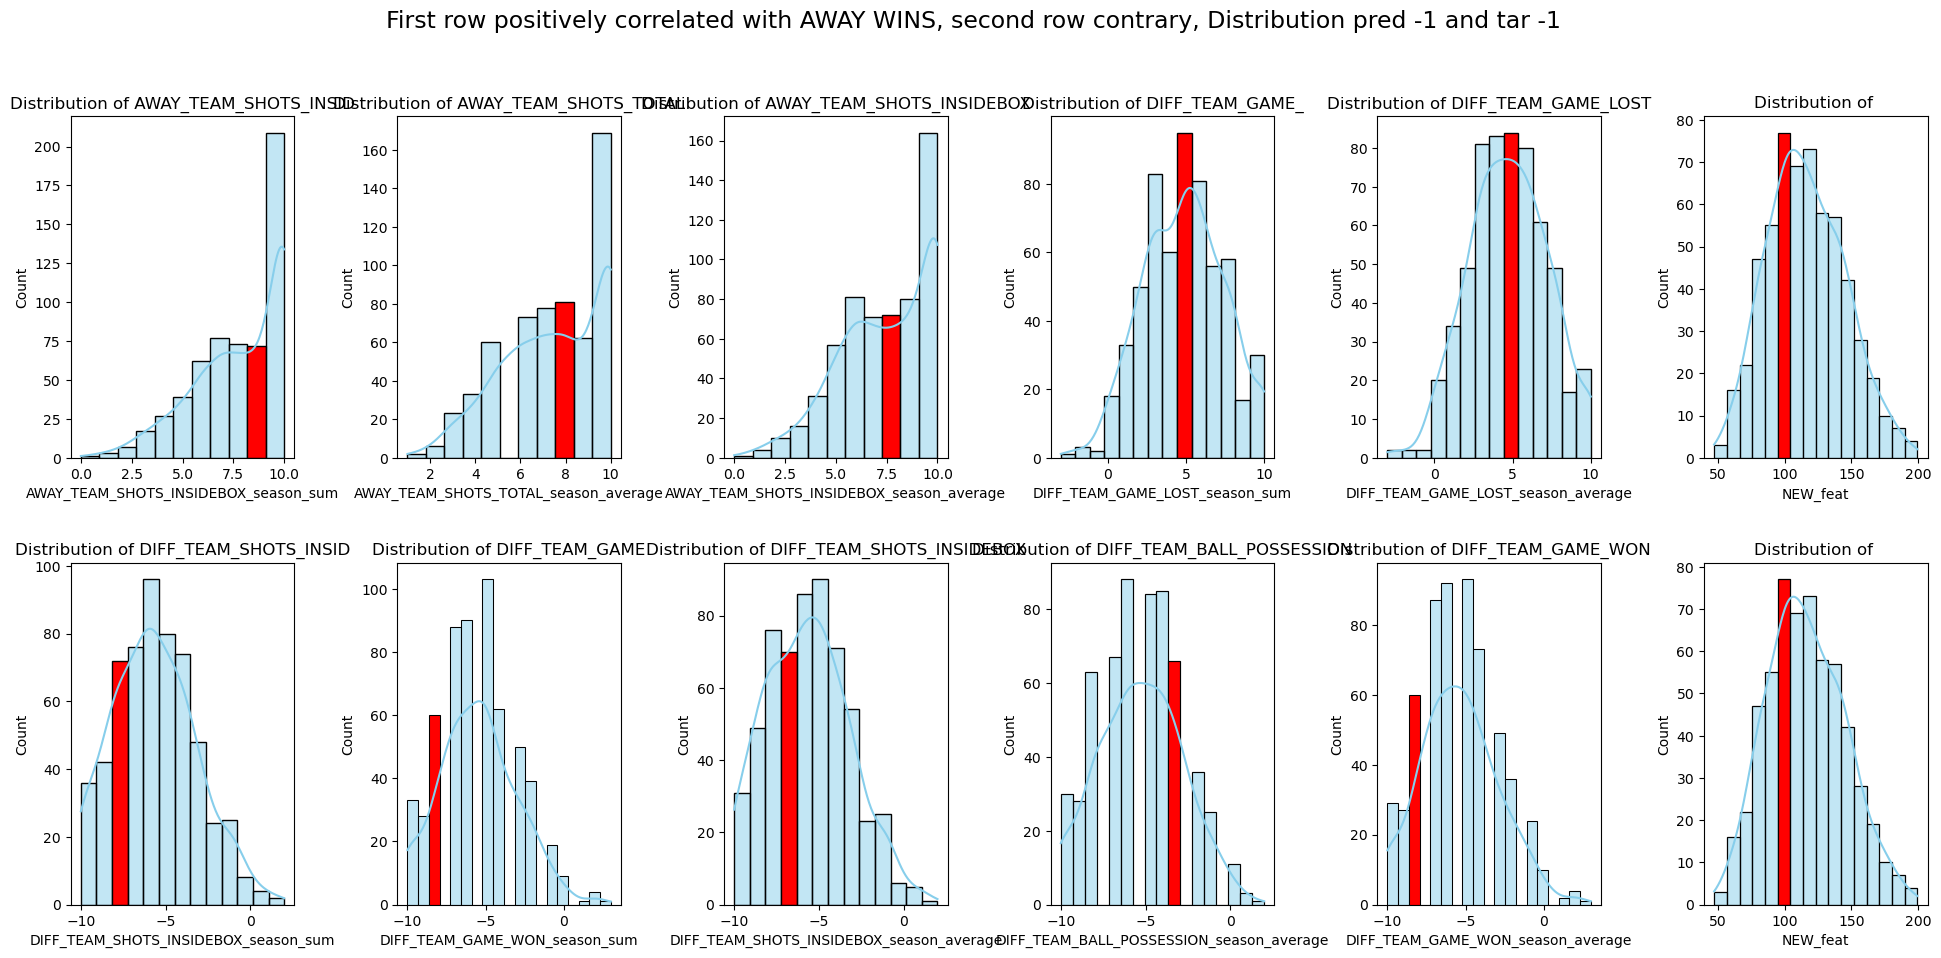

In [61]:
# Now let's look at true negative

View_Important_features(TrueN)

# Adjust layout
plt.suptitle('First row positively correlated with AWAY WINS, second row contrary, Distribution pred -1 and tar -1', fontsize = 17)
plt.tight_layout(pad=3.0)
plt.show()

In [62]:
# Now let's look at other distribution

type3_error = confusion_data1[(confusion_data1["Pred_train"] != 0) & (confusion_data1["Target_train"] == 0)].index
TrueD = confusion_data1[(confusion_data1["Pred_train"] == 0) & (confusion_data1["Target_train"] == 0)].index
FalseD = confusion_data1[(confusion_data1["Pred_train"] == 0) & (confusion_data1["Target_train"] != 0)].index


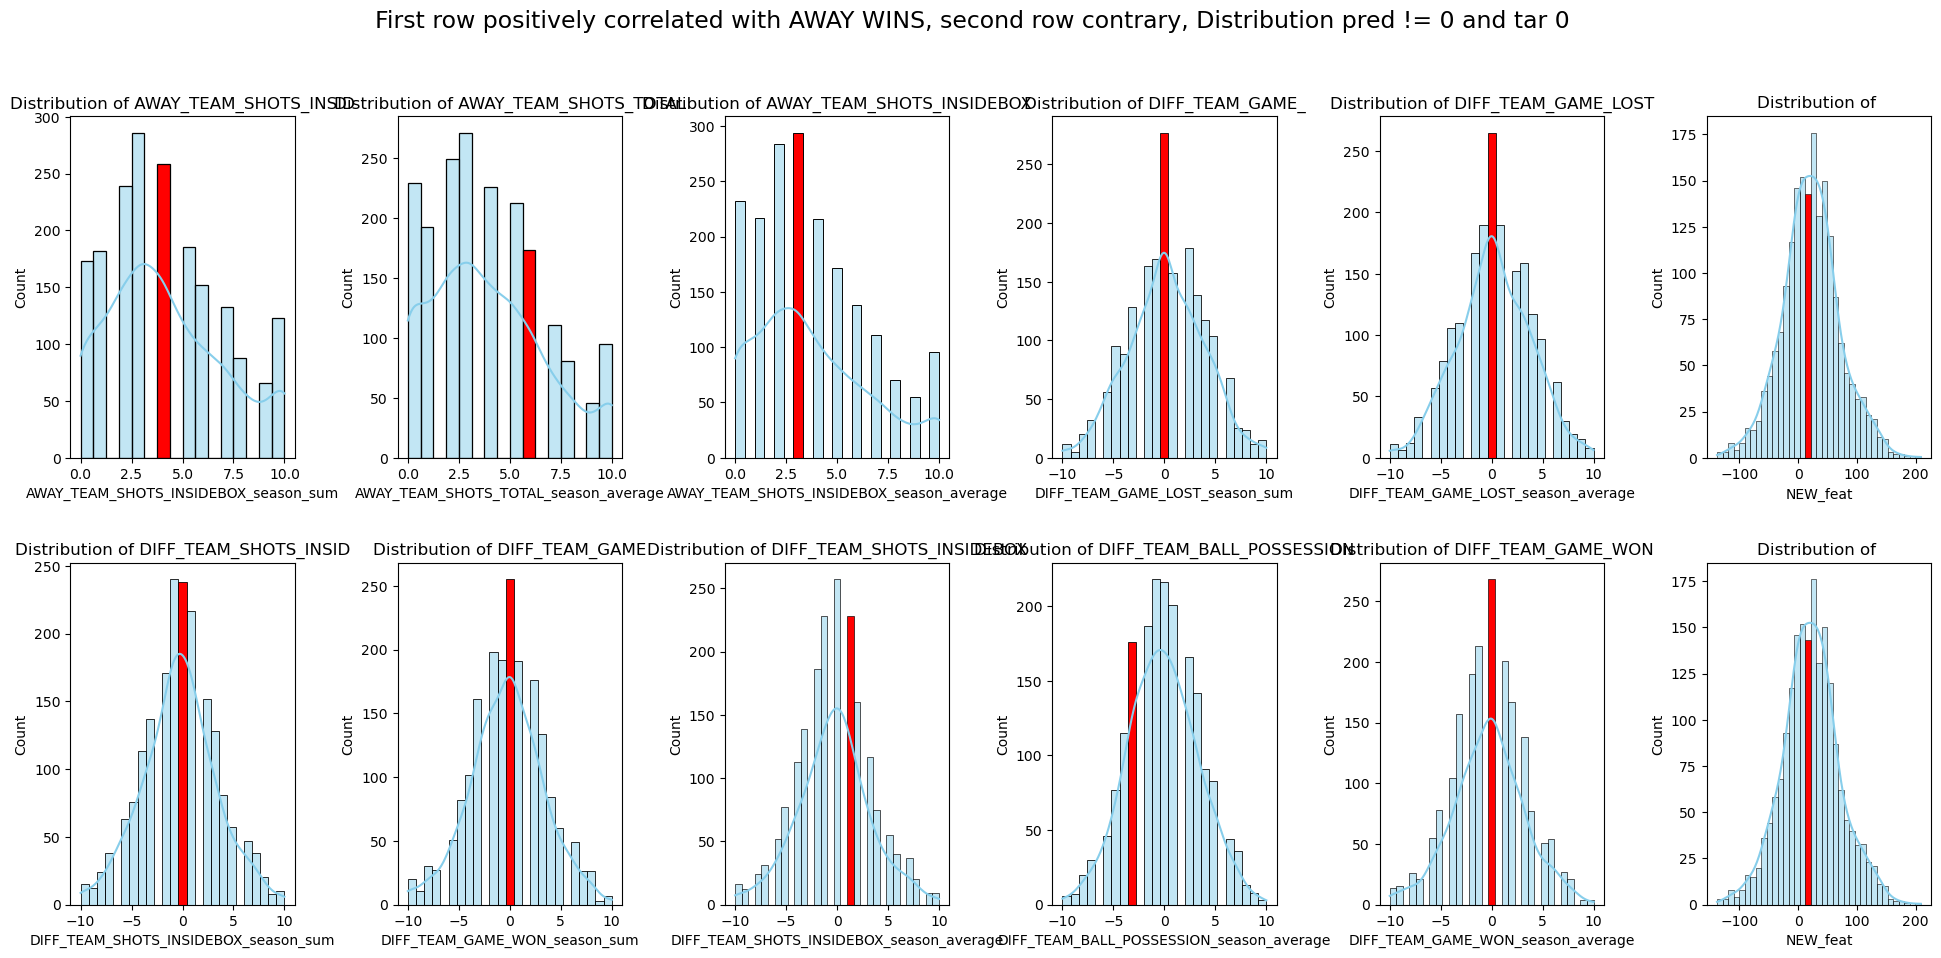

In [63]:
View_Important_features(type3_error)

# Adjust layout
plt.suptitle('First row positively correlated with AWAY WINS, second row contrary, Distribution pred != 0 and tar 0', fontsize = 17)
plt.tight_layout(pad=3.0)
plt.show()

In [64]:
l = [len(TrueP),len(TrueN),len(TrueD),len(FalseD),len(type1_error),len(type2_error),len(type3_error),len(confusion_data1)]
print("True Home Wins                 ",len(TrueP), "cumSum",l[0])
print("True Away wins                  ",len(TrueN),"cumSum", sum(l[:2]))
print("True Draw                       ",len(TrueD),"cumSum", sum(l[:3]))
print("False Draw                      ", len(FalseD),"cumSum", sum(l[:4]))
print("Target Home wins pred Away wins ", len(type1_error),"cumSum", sum(l[:5]))
print("Target Away wins pred Home wins",len(type2_error),"cumSum", sum(l[:6]))
print("Target draw pred no draw       ",len(type3_error),"cumSum", sum(l[:7]))
print("The number of rows we have     ", len(confusion_data1))

True Home Wins                  3053 cumSum 3053
True Away wins                   587 cumSum 3640
True Draw                        24 cumSum 3664
False Draw                       68 cumSum 3732
Target Home wins pred Away wins  175 cumSum 3907
Target Away wins pred Home wins 1644 cumSum 5551
Target draw pred no draw        1885 cumSum 7436
The number of rows we have      7436


In [65]:
important_feat = corr_draw[corr_away.abs() > corr_away.abs().quantile(0.5)].index

In [100]:
# In order to make our model better, since predicting the draw is harder
# We need to try to reduce our type2 error
# To do that we need to cluster the data that we have on the row where we have type2 error

data_cluster = new_features_V4(train_data2)
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe only contains the features you want to cluster
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Convert the scaled data back to a DataFrame to maintain index
scaled_df = pd.DataFrame(scaled_data, index=data_cluster.index, columns=data_cluster.columns)
scaled_df = new_features_V4(scaled_df)
scaled_df = scaled_df.loc[:,important_feat.to_list()]
scaled_df.head()


HOME_TEAM_SHOTS_TOTAL_season_sum  HOME_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                                                           
0                          -0.510771                             -0.750167   
1                           0.545411                              1.326658   
2                          -0.158711                             -0.750167   
4                          -0.510771                             -0.404030   
5                           0.897471                              0.634383   

    HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                          
0                                0.169606   
1                               -0.546517   
2                                0.169606   
4                               -0.904578   
5                                1.601851   

    HOME_TEAM_SHOTS_ON_TARGET_season_sum  HOME_TEAM_PASSES_season_sum  \
ID                                                                      
0                              -0.707358                    -0.775042   
1                               0.692701                     1.314979   
2                              -0.707358                    -1.123379   
4                              -0.357343                    -0.078368   
5                               0.342687                     1.314979   

    HOME_TEAM_SUCCESSFUL_PASSES_season_sum  HOME_TEAM_SAVES_season_sum  \
ID                                                                       
0                                -0.711390                    0.098419   
1                                 1.024337                    1.862480   
2                                -1.058535                   -0.960018   
4                                -0.364244                   -0.254394   
5                                 1.718628                    0.098419   

    HOME_TEAM_CORNERS_season_sum  HOME_TEAM_ATTACKS_season_sum  \
ID                                                               
0                      -0.501424                     -0.916608   
1                       0.577084                      0.887912   
2                      -0.860927                     -0.194800   
4                      -0.141922                     -0.194800   
5                       0.217581                      0.527008   

    HOME_TEAM_DANGEROUS_ATTACKS_season_sum  ...  \
ID                                          ...   
0                                -0.063434  ...   
1                                 0.644404  ...   
2                                -0.417353  ...   
4                                -0.063434  ...   
5                                 0.644404  ...   

    DIFF_TEAM_BALL_POSSESSION_5_last_match_average  \
ID                                                   
0                                        -0.772296   
1                                         0.016775   
2                                        -1.035320   
4                                        -0.772296   
5                                         1.857942   

    DIFF_TEAM_ATTACKS_5_last_match_average  \
ID                                           
0                                -0.491911   
1                                 1.373346   
2                                -1.291307   
4                                -1.024841   
5                                 1.639811   

    DIFF_TEAM_DANGEROUS_ATTACKS_5_last_match_average  \
ID                                                     
0                                           0.053150   
1                                          -0.212856   
2                                          -1.010871   
4                                          -0.212856   
5                                           0.319155   

    DIFF_TEAM_GOALS_5_last_match_average  \
ID                                         
0                               0.035735   
1                               2.106072   
2                 

In [110]:
# target_train = New_train_scores.loc[data_cluster.index, "GOAL_DIFF_HOME_AWAY"].values
# target_train

array([-2.,  0., -1., ..., -1., -1.,  2.])

In [115]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=4)  # Using the first four principal components
reduced_data = pca.fit_transform(scaled_df)

# Initialize the SVM model
svm = SVC(kernel='rbf')

target_train = (train_scores["HOME_WINS"] - train_scores["AWAY_WINS"]).loc[data_cluster.index].values

# Fit the model
svm.fit(reduced_data, target_train)  # Assuming target_train is your target variable

# Predict cluster labels
labels = svm.predict(reduced_data)

# Add cluster labels to the original dataframe
data_cluster['Cluster'] = labels

In [113]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensionality for visualization
pca = PCA(n_components=4)  # Using the first four principal components
reduced_data = pca.fit_transform(scaled_df)

# Define a range of values for the hyperparameter C
# C_values = [0.01, 0.1, 1]
C_values = [0.01]

# Initialize best classifier and score variables
best_classifier = None
best_score = -1
best_C = None

# Iterate over different values of C
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    
    # Perform cross-validation
    scores = cross_val_score(clf, reduced_data, target_train, cv=5, scoring='accuracy')
    
    # Compute mean accuracy
    mean_score = np.mean(scores)
    
    # Print mean accuracy
    print(f"Linear SVM with C={C}: Mean Accuracy = {mean_score}")
    
    # Update best classifier if current classifier has higher accuracy
    if mean_score > best_score:
        best_classifier = clf
        best_score = mean_score
        best_C = C

# Fit the best classifier
best_classifier.fit(reduced_data, target_train)

# Predict cluster labels
labels = best_classifier.predict(reduced_data)

# Add cluster labels to the original dataframe
data_cluster['Cluster'] = labels

# Display the best classifier and its C value
print(f"Best classifier: Linear SVM with C={best_C}, Mean Accuracy = {best_score}")

Linear SVM with C=0.01: Mean Accuracy = 0.2715720481800644
Best classifier: Linear SVM with C=0.01, Mean Accuracy = 0.2715720481800644


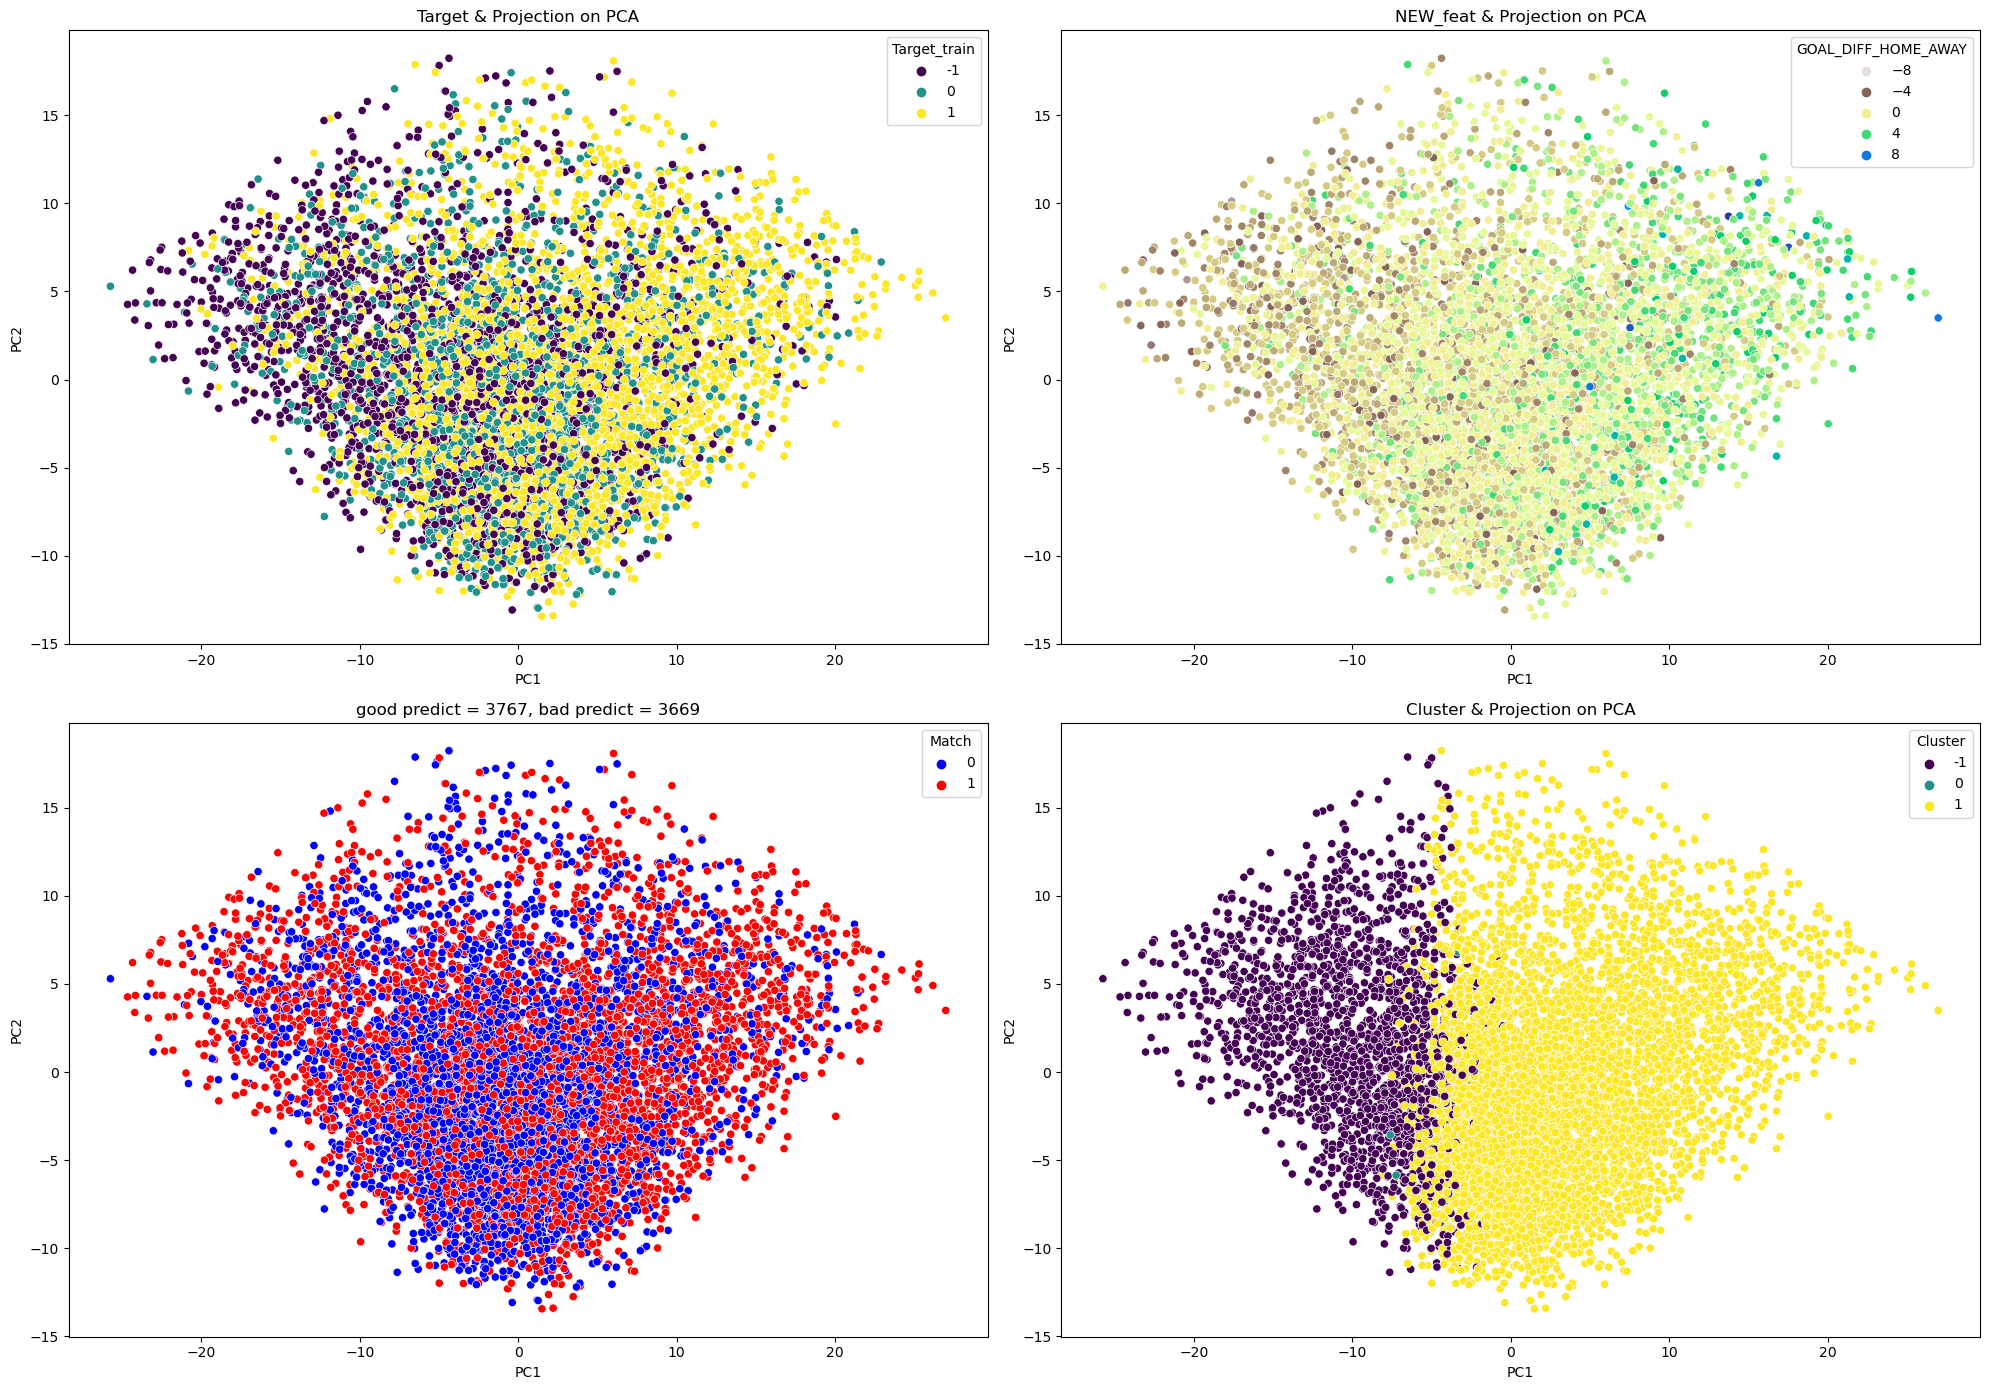

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


def projection_PCA(labels):
    # Reduce dimensionality for visualization
    pca = PCA(n_components=5)
    reduced_data = pca.fit_transform(scaled_data)

    # Create a dataframe with the reduced data
    # reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    reduced_df = pd.DataFrame({
    'PC1': reduced_data[:, 0],
    'PC2': reduced_data[:, 1]
})
    reduced_df['Cluster'] = labels
    # reduced_df['Cluster2'] = modified_pred

    reduced_df2 = reduced_df.copy()
    reduced_df2.index = data_cluster.index
    reduced_df2 = pd.merge(reduced_df2,new_features_V4(train_data2), left_index=True,right_index=True)
    reduced_df2 = pd.merge(reduced_df2,confusion_target1, left_index=True,right_index=True)
    reduced_df2 = pd.merge(reduced_df2,confusion_pred1, left_index=True,right_index=True)
    reduced_df2 = pd.merge(reduced_df2,New_train_scores, left_index=True,right_index=True)

    reduced_df2['Match'] = (reduced_df2['Cluster'] == reduced_df2['Target_train']).astype(int)



    # Create subplots with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Plot the clusters for reduced_df2 in the first row
    sns.scatterplot(ax=axes[0, 0], data=reduced_df2, x='PC1', y='PC2', hue='Target_train', palette='viridis')
    axes[0, 0].set_title('Target & Projection on PCA')

    sns.scatterplot(ax=axes[0, 1], data=reduced_df2, x='PC1', y='PC2', hue='GOAL_DIFF_HOME_AWAY', palette='terrain_r')
    axes[0, 1].set_title('NEW_feat & Projection on PCA')

    custom_palette = {0: 'blue', 1: 'red'}
    # Plot the same clusters for reduced_df2 in the second row
    sns.scatterplot(ax=axes[1, 0], data=reduced_df2, x='PC1', y='PC2', hue='Match', palette=custom_palette)
    gp = reduced_df2['Match'].sum()
    nogp = len(reduced_df2) - gp
    axes[1, 0].set_title(f'good predict = {gp}, bad predict = {nogp}')

    sns.scatterplot(ax=axes[1, 1], data=reduced_df2, x='PC1', y='PC2', hue='Cluster', palette='viridis')
    axes[1, 1].set_title('Cluster & Projection on PCA')

    plt.tight_layout()
    plt.show()

projection_PCA(labels)

In [98]:
New_train_scores

ID  GOAL_DIFF_HOME_AWAY
0          0                 -2.0
1          1                  0.0
2          2                 -1.0
3          3                  1.0
4          4                  0.0
...      ...                  ...
12298  12298                 -1.0
12299  12299                 -1.0
12300  12300                 -1.0
12301  12301                  3.0
12302  12302                  2.0

[12303 rows x 2 columns]

In [70]:
# Reduce dimensionality for visualization
n = 20
pca = PCA(n_components=n)
reduced_data = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

# Print the explained variance
print(f"Explained variance by the first {n} principal components: {explained_variance}")
print(f"Total explained variance by the first {n} principal components: {total_explained_variance}")

Explained variance by the first 20 principal components: [0.15314657 0.07745358 0.03581647 0.03127747 0.02465907 0.02239339
 0.02110657 0.02045025 0.01812558 0.01747218 0.0171535  0.01641268
 0.01559858 0.01523694 0.01478667 0.01298986 0.01284116 0.01255802
 0.01204671 0.01188656]
Total explained variance by the first 20 principal components: 0.5634118127954207


In [89]:
test_home = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('/Users/badremhiouah/Desktop/Python/Data challenge QRT/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)

# X_final = create_features(test_data)
# X_final = X_final[Selection_features]

# # Replace NaN values with 0
# X_final.fillna(0, inplace=True)

# predictions = lasso_cv_model.predict(X_final)
# predictions = convert_to_outcome_df(predictions, test_data)

# predictions.index = test_data.index
# submission = predictions.reset_index()
# submission.to_csv('./Badre_submission.csv', index=False)

In [78]:
important_feat_test = important_feat.to_list()
# Replace elements starting with 'DIFF' with 'HOME'
modified_list = ['HOME' + s[4:] if s.startswith('DIFF') else s for s in important_feat_test]
modified_list

['HOME_TEAM_SHOTS_TOTAL_season_sum',
 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum',
 'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
 'HOME_TEAM_PASSES_season_sum',
 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum',
 'HOME_TEAM_SAVES_season_sum',
 'HOME_TEAM_CORNERS_season_sum',
 'HOME_TEAM_ATTACKS_season_sum',
 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum',
 'HOME_TEAM_GOALS_season_sum',
 'HOME_TEAM_GAME_WON_season_sum',
 'HOME_TEAM_GAME_LOST_season_sum',
 'HOME_TEAM_SHOTS_TOTAL_season_average',
 'HOME_TEAM_SHOTS_INSIDEBOX_season_average',
 'HOME_TEAM_SHOTS_OFF_TARGET_season_average',
 'HOME_TEAM_SHOTS_ON_TARGET_season_average',
 'HOME_TEAM_PASSES_season_average',
 'HOME_TEAM_SUCCESSFUL_PASSES_season_average',
 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average',
 'HOME_TEAM_SAVES_season_average',
 'HOME_TEAM_CORNERS_season_average',
 'HOME_TEAM_BALL_POSSESSION_season_average',
 'HOME_TEAM_ATTACKS_season_average',
 'HOME_TEAM_DANGEROUS_ATTACKS_season_average',
 'HOM

In [83]:
print(test_data.loc[:,modified_list].isna().any(axis= 1).sum())
print(test_data.isna().any(axis= 1).sum())
len(test_data)

3177
5569


25368

In [91]:
test_datacopy = test_data.copy()

In [92]:
train_data.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)

In [95]:
test_data = test_datacopy.copy()
set1 = list((train_data.corrwith(train_scores["AWAY_WINS"]) >= 0).index)
set2 = list((train_data.corrwith(train_scores["AWAY_WINS"]) < 0).index)

test_data2 = scaler.transform(test_data)
# Convert back to DataFrame with the original columns and index
scaled_df = pd.DataFrame(test_data2, columns=test_data.columns, index=test_data.index)
# print(scaled_df.isna().any(axis = 1).sum())

def fill_missing_values_pandas(df):
    # Calculate the row-wise mean for set1 and set2
    mean_set1 = df[set1].mean(axis=1)
    mean_set2 = df[set2].mean(axis=1)

    # Use DataFrame's apply method with lambda to broadcast row-wise means efficiently
    df[set1] = df[set1].apply(lambda row: row.fillna(mean_set1[row.name]), axis=1)
    df[set2] = df[set2].apply(lambda row: row.fillna(mean_set2[row.name]), axis=1)

    # Print the number of rows that still have any NaN values
    print(df.isna().any(axis=1).sum())
    
    return df

test_data = fill_missing_values_pandas(scaled_df)
test_data = create_features(test_data)

test_data

0


HOME_TEAM_SHOTS_TOTAL_season_sum  HOME_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                                                              
12303                         -0.484573                              0.580669   
12304                         -0.484573                             -0.785508   
12305                          0.908698                              1.946846   
12306                          0.212062                              0.922213   
12307                          0.212062                             -0.102419   
...                                 ...                                   ...   
37666                          0.212062                              0.239125   
37667                          0.212062                              0.239125   
37668                          1.953651                              1.946846   
37669                         -0.136255                             -0.443964   
37670                          0.560380                              1.263758   

       HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                             
12303                               0.174105   
12304                              -0.182185   
12305                               1.242973   
12306                               0.174105   
12307                               0.530394   
...                                      ...   
37666                               0.174105   
37667                              -0.894763   
37668                               1.955552   
37669                               0.174105   
37670                               1.242973   

       HOME_TEAM_SHOTS_ON_TARGET_season_sum  \
ID                                            
12303                             -1.101255   
12304                             -0.751748   
12305                              1.345293   
12306                              1.694799   
12307                             -0.402241   
...                                     ...   
37666                              0.296772   
37667                              1.345293   
37668                              1.345293   
37669                             -0.402241   
37670                             -0.052734   

       HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum  HOME_TEAM_PASSES_season_sum  \
ID                                                                          
12303                              -0.535903                     1.598862   
12304                               0.518579                    -1.152221   
12305                              -1.238890                    -0.120565   
12306                               0.167085                     0.911091   
12307                               0.167085                    -1.496107   
...                                      ...                          ...   
37666                               0.870073                     0.567206   
37667                              -0.535903                     0.911091   
37668                               1.221567                     0.223320   
37669                               0.870073                     0.911091   
37670                              -0.184409                    -0.808336   

       HOME_TEAM_SUCCESSFUL_PASSES_season_sum  HOME_TEAM_SAVES_season_sum  \
ID                                                                          
12303                                1.334302                    1.854602   
12304                               -1.079195                   -0.931154   
12305                                0.299946                   -1.627593   
12306                                0.644732                   -0.582934   
12307                               -1.423980                   -0.931154   
...                                       ...                         ...   
37666                                0.644732                   -0.234715   
37667                

In [97]:
# test_data = test_data.loc[:,important_feat]
# reduced_data2 = pca.transform(test_data)

# labels = svm.predict(reduced_data2)

In [ ]:
predictions = convert_to_outcome_df(labels,test_data)

In [ ]:
submission = predictions.reset_index()
submission.to_csv('./Badre_submission.csv', index=False)